#  Rainfall Weather Forecasting

## Project Description

   <b> Weather forecasting</b> is the application of science and technology to predict the <b>conditions of the atmosphere</b> for a given <b>location</b> and <b>time</b>. <b>Weather forecasts</b> are made by collecting <b>quantitative data</b> about the <b>current state of the atmosphere</b> at a given place and using meteorology to project how the atmosphere will change.

   Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. <b>Here, predict two things:</b>


<b>1. Problem Statement:</b>
    
 a)Design a predictive model with the use of machine learning algorithms to forecast **whether or not it will rain tomorrow.**
 
 b)Design a predictive model with the use of machine learning algorithms to **predict how much rainfall could be there.**


**Dataset Description:**
Number of columns: 23


## Independent Variables
1.	<b>Date</b>: The date of observation
2.	<b>Location</b>: The common name of the location of the weather station
3.	<b>MinTemp</b>: The minimum temperature in degrees celsius
4.	<b>MaxTemp</b>: The maximum temperature in degrees celsius
5.	<b>Rainfall</b>: The amount of rainfall recorded for the day in mm
6.	<b>Evaporation</b>: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7.	<b>Sunshine</b>: The number of hours of bright sunshine in the day.
8.	<b>WindGustDir</b>: The direction of the strongest wind gust in the 24 hours to midnight
9.	<b>WindGustSpeed</b>:The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10.	<b>WindDir9am</b>: Direction of the wind at 9am
11.	<b>WindDir3pm</b>: Direction of the wind at 3pm
12.	<b>WindSpeed9am</b>: Wind speed (km/hr) averaged over 10 minutes prior to 9am
13.	<b>WindSpeed3pm</b>: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14.	<b>Humidity9am</b>: Humidity (percent) at 9am
15.	<b>Humidity3pm</b>: Humidity (percent) at 3pm
16.	<b>Pressure9am</b>: Atmospheric pressure (hpa) reduced to mean sea level at 9am
17.	<b>Pressure3pm</b>: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18.	<b>Cloud9am</b>: Fraction of sky obscured by cloud at 9am. 
19.	<b>Cloud3pm</b>: Fraction of sky obscured by cloud at 3pm. 
20.	<b>Temp9am</b>: Temperature (degrees C) at 9am
21.	<b>Temp3pm</b>: Temperature (degrees C) at 3pm
22.	<b>RainToday -Boolean</b>: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

## Dependent Variable
23.	<b>RainTomorrow</b>: The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

## Let's Import majorly required Libraries and Later import based on requirements

In [2]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Enable Grid Automatically
sns.set_style('darkgrid')

#Set Run time configuration font size =16
plt.rcParams['font.size']=16


#Set Run time configuration figure size = (20,16)
plt.rcParams['figure.figsize']=(20,16)

#Set Run Time configuration parameters of back ground color as Light Green in HEX 
plt.rcParams['figure.facecolor']='#90EE90'

In [4]:
# Using Pandas, Let's import the rainfall Claims dataset CSV file
rainfall=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [5]:
print('No of Rows:',rainfall.shape[0])
print('No of Columns:',rainfall.shape[1])
pd.set_option('display.max_columns', None) # We will be able to view truncated columns as a result.
rainfall.head()

No of Rows: 8425
No of Columns: 23


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [6]:
#Sort columns based on datatypes.
rainfall.columns.to_series().groupby(rainfall.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

# Statistical Analysis

<b> Let's see if the dataset has any whitespace, 'NA', or '-'. </b>

In [8]:
rainfall.isin([' ','NA','-']).sum().any()

False

In [9]:
rainfall.isin(['?']).sum().any()

False

<b> Let replace '?' with np.NaN </b>

In [10]:
rainfall=rainfall.replace('?',np.NaN)

## Missing value check 

In [11]:
#Determining the dataset's missing data percentage
missing_values = rainfall.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(rainfall))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Sunshine                 3994       47.406528
Evaporation              3512       41.685460
Cloud3pm                 2455       29.139466
Cloud9am                 2421       28.735905
Pressure3pm              1312       15.572700
Pressure9am              1309       15.537092
WindGustDir               991       11.762611
WindGustSpeed             991       11.762611
WindDir9am                829        9.839763
WindDir3pm                308        3.655786
RainToday                 240        2.848665
Rainfall                  240        2.848665
RainTomorrow              239        2.836795
WindSpeed3pm              107        1.270030
Humidity3pm               102        1.210682
Temp3pm                    96        1.139466
WindSpeed9am               76        0.902077
MinTemp                    75        0.890208
MaxTemp                    60        0.712166
Humidity9am                59        0.700297
Temp9am                    56     

#### Observations :
- The fields 'property_damage', 'police_report_available', and 'collision_type' have blank values.
- 100% null values in the _c39 columns. Going to drop it.
- Other features with missing values are categorical in nature. We went ahead and assigned them the mode of that specific category.

#### Missing value imputation

In [12]:
# Eliminating pointless columns
rainfall.drop(['Date','Evaporation','Sunshine'],axis=1,inplace=True)

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
rainfall = imputer.fit_transform(rainfall)

#### Checking for missing values after imputation

In [15]:
rainfall

array([['Albury', 13.4, 22.9, ..., 21.8, 'No', 'No'],
       ['Albury', 7.4, 25.1, ..., 24.3, 'No', 'No'],
       ['Albury', 12.9, 25.7, ..., 23.2, 'No', 'No'],
       ...,
       ['Uluru', 5.4, 26.9, ..., 26.1, 'No', 'No'],
       ['Uluru', 7.8, 27.0, ..., 26.0, 'No', 'No'],
       ['Uluru', 14.9, 19.0, ..., 20.9, 'No', 'No']], dtype=object)

In [16]:
# Heatmap of missing value
sns.heatmap(rainfall.isnull(),cmap="gist_earth")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

#### Observations :
<b> Finally, there is no missing value.

We are now ready to move on!</b>

#### Details on the Policy_csl column :
- <b>Combined single limit (CSL):</b>
 The combined total of the bodily injury liability coverage and property damage liability coverage per incident or accident is expressed as a single number called the CSL.
- The Policy_csl columns in this dataset include numerical values separated by a slash (/), creating an object datatype.
- <b> This column will be divided into two CSL sections for people and accidents.</b>

In [14]:
# Extracting policy_csl at '/' and splitting it.
rainfall['CSL_Personal']=rainfall.policy_csl.str.split('/',expand=True)[0]
rainfall['CSL_Accidental']=rainfall.policy_csl.str.split('/',expand=True)[1]

In [15]:
# We can now remove the policy_csl column. 
rainfall.drop("policy_csl",axis=1,inplace=True)

<b> With datetime datatypes, we have two features. We are going to divide them by date, month, and year.</b>

In [16]:
# Converting Date columns to datetime data type from object type
rainfall['policy_bind_date']=pd.to_datetime(rainfall['policy_bind_date'])
rainfall['incident_date']=pd.to_datetime(rainfall['incident_date'])

In [17]:
# Identifying and obtaining Day, Month and Year column from policy_bind_date
rainfall['policy_bind_day'] = rainfall['policy_bind_date'].dt.day
rainfall['policy_bind_month'] = rainfall['policy_bind_date'].dt.month
rainfall['policy_bind_year'] = rainfall['policy_bind_date'].dt.year

# Identifying and obtaining the Day, Month, and Year columns from incident_date
rainfall['incident_day'] = rainfall['incident_date'].dt.day
rainfall['incident_month'] = rainfall['incident_date'].dt.month
rainfall['incident_year'] = rainfall['incident_date'].dt.year

In [18]:
# Policy_bind_date and incident_date columns can now be deleted because extraction has been completed.
rainfall.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [19]:
# 2015 is the incident year for all data, therefore we're dropping it.
rainfall.drop(['incident_year'],axis=1,inplace=True)

<b> The 'auto_year' column in our table lists the years since which automobiles have been legally allowed to drive. Simple: The age of the automobile. Here, we'll do some basic feature engineering to build new columns that include the age of the car and drop earlier.</b>

<b> Since 2015 is the incident year, we will utilize 2015 as the base year when creating additional columns.

In [20]:
# Let's deduct the age of the car from auto_year and then compare the result to the year 2018
rainfall['Automobile_Age']=2015 - rainfall['auto_year']
# Let us Eliminate the auto-year column
rainfall.drop("auto_year",axis=1,inplace=True)

<b> Spliting feature in categorical and numerical variable </b>

In [21]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [22]:
rainfall.columns.to_series().groupby(rainfall.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

### Statistical Matrix

In [23]:
rainfall.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [24]:
rainfall[Category].describe().T.style.background_gradient(cmap='summer_r')

#### Start by listing Value counts and possible Sub-categories for various categorial attributes.

In [25]:
for i in Category:
    print(i)
    print(rainfall[i].value_counts())
    print("="*100)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

### Let's Investigate the target variable.

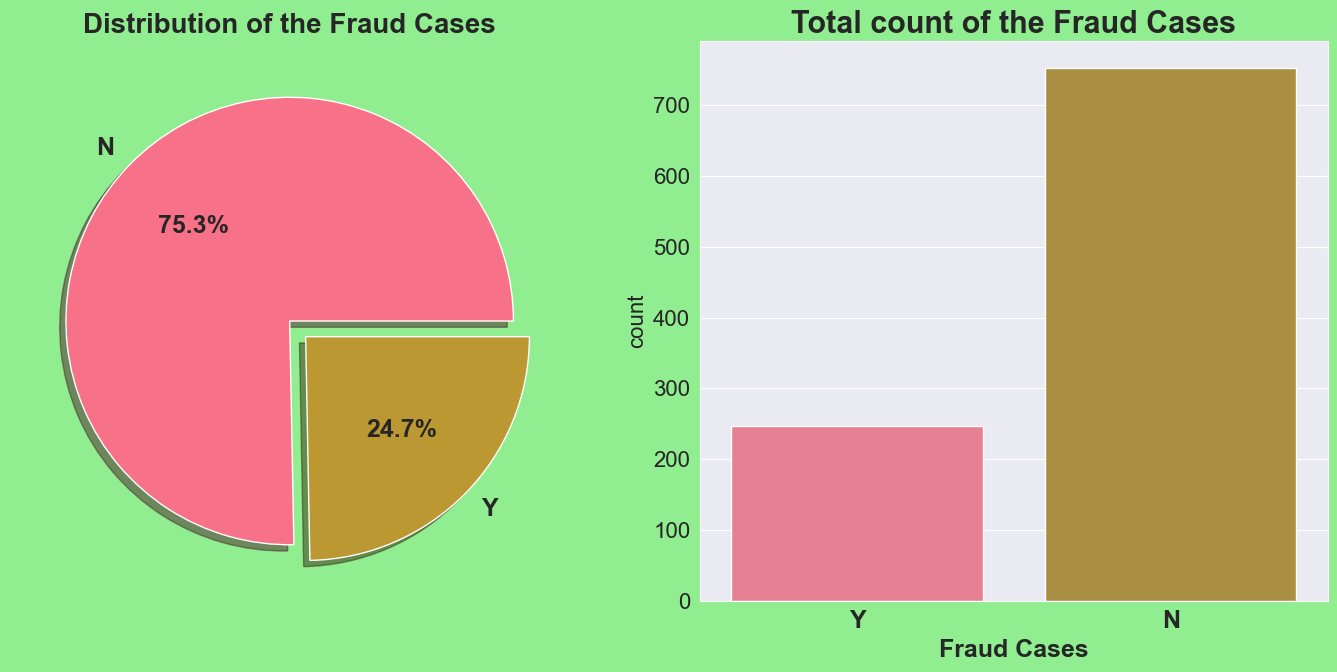

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
rainfall['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Distribution of the Fraud Cases', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('fraud_reported',data=rainfall,ax=ax[1])
ax[1].set_title('Total count of the Fraud Cases',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- About 24.7% of all instances involve fraud.
- 'Fraud_reported' is the variable we are trying to forecast. We may infer that the dataset is unbalanced from the count plot.

### let's go for learning more, start comparing the target variable to independent features.


###  Analysing Age vs Fraud

In [27]:
print('Minimum Age :',rainfall.age.min(),'Years')
print('Maximum Age :',rainfall.age.max(),'Years')
print('Average Age :',rainfall.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


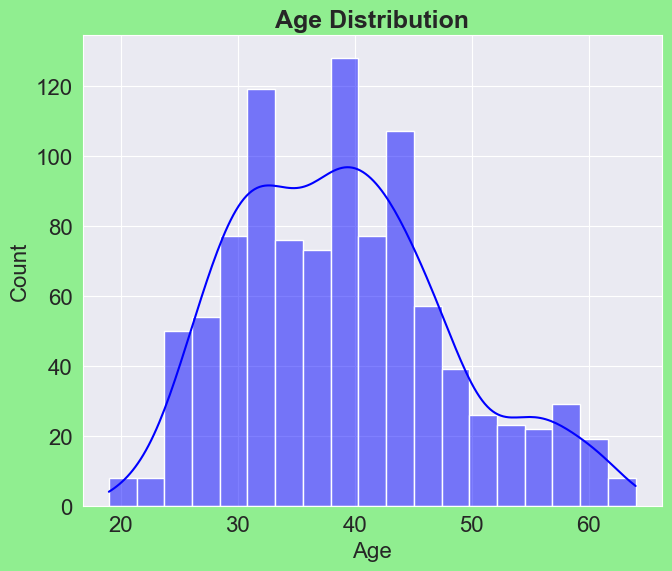

In [28]:
plt.figure(figsize=(7,6))
sns.histplot(rainfall.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [29]:
# Dividing ages into various age groups
rainfall['age_bins'] = pd.cut(rainfall.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

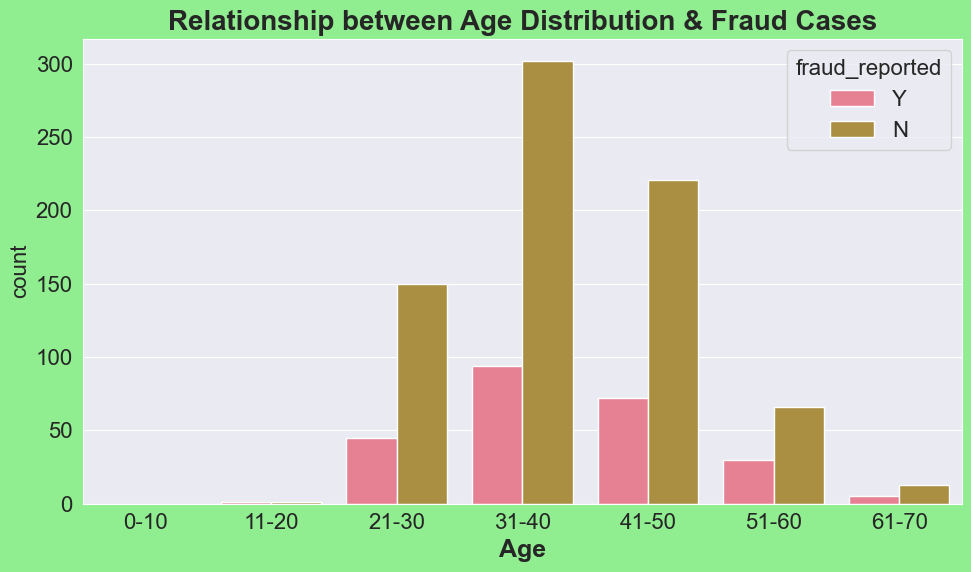

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x=rainfall.age_bins, hue=rainfall.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Relationship between Age Distribution & Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

#### Observation:
- People between the ages of 31 and 50 account for the majority of fraud instances.
- Very few incidences among those aged 60 and older.

### Relationship between Policy State and Fraud cases

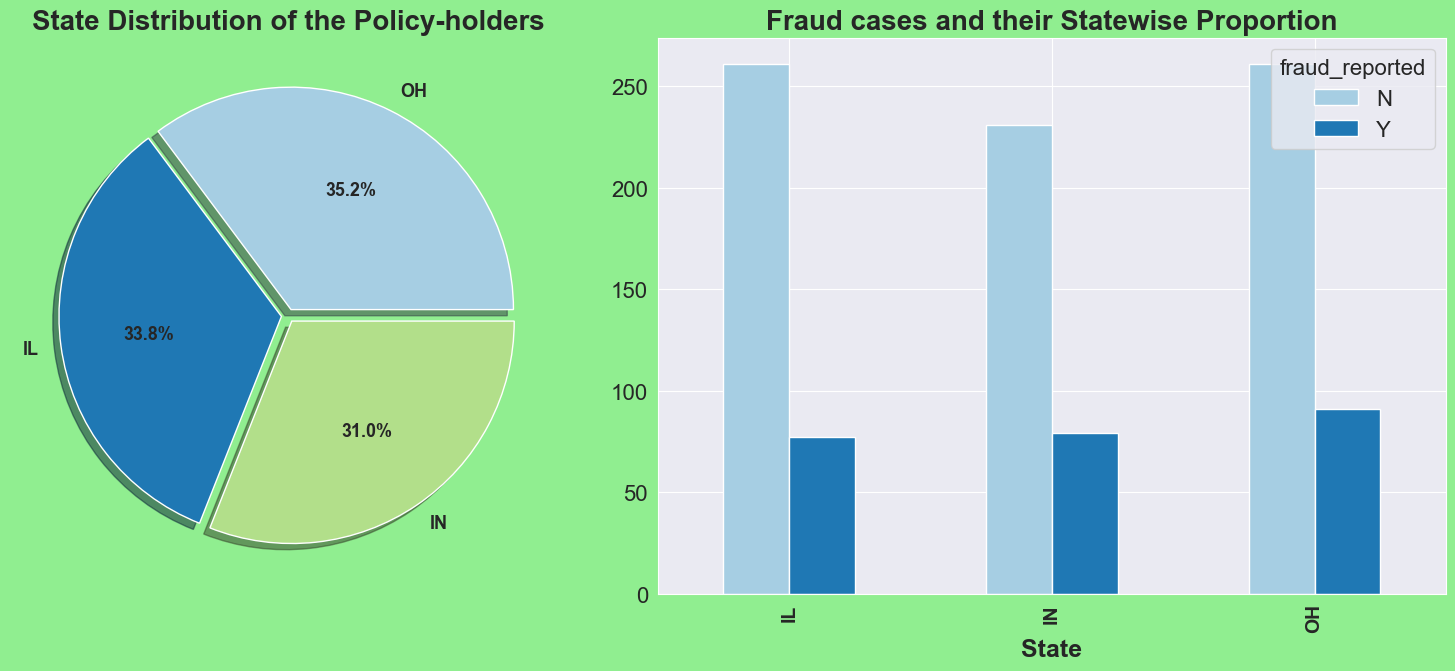

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Paired')
fig,ax=plt.subplots(1,2,figsize=(16,7))
rainfall['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('State Distribution of the Policy-holders', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(rainfall['policy_state'], rainfall['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases and their Statewise Proportion',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- The number of instances from each state is nearly the same.
- Ohio has the most fraud cases in the country.

### Relationship between Insured Gender and Fraud cases

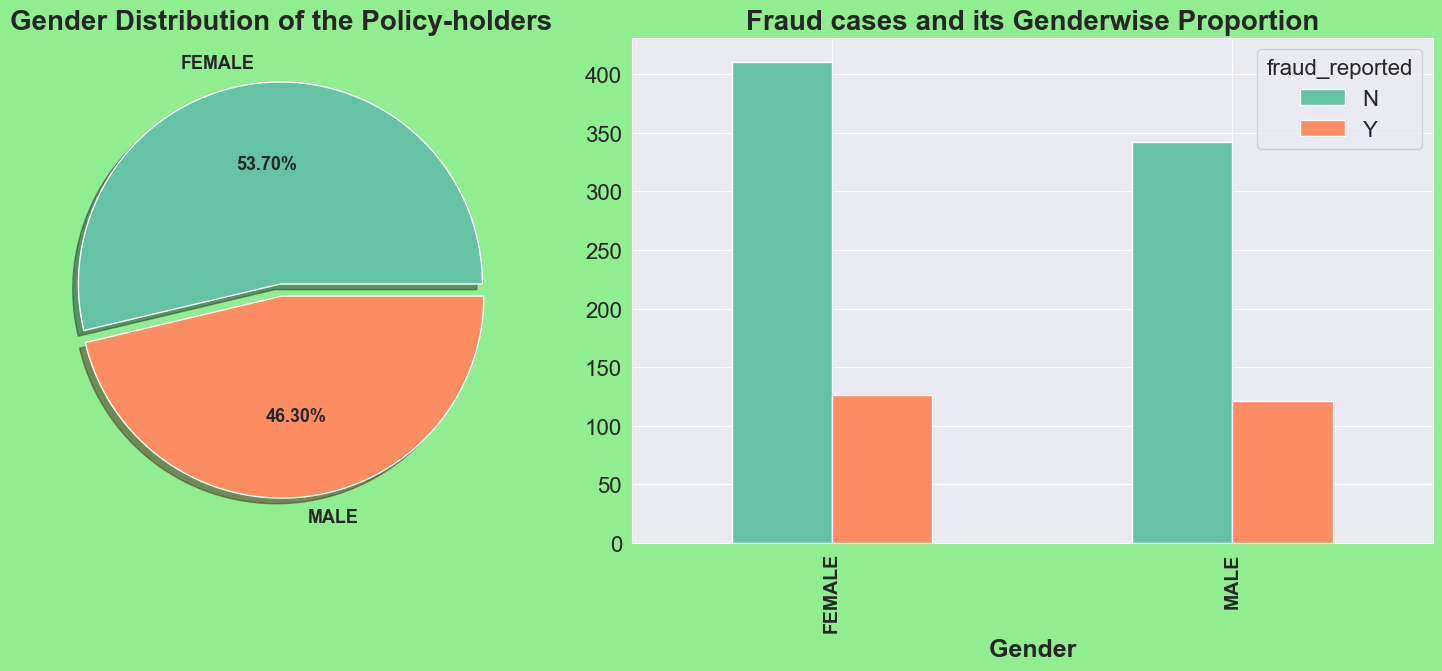

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
fig,ax=plt.subplots(1,2,figsize=(16,7))
rainfall['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.2f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender Distribution of the Policy-holders', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(rainfall['insured_sex'], rainfall['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases and its Genderwise Proportion',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations :
- Number of claims come from female is higher than which reported by male insured.
- Almost same amount of fraud cases comes from same gender.

### Education_level vs Fraud cases

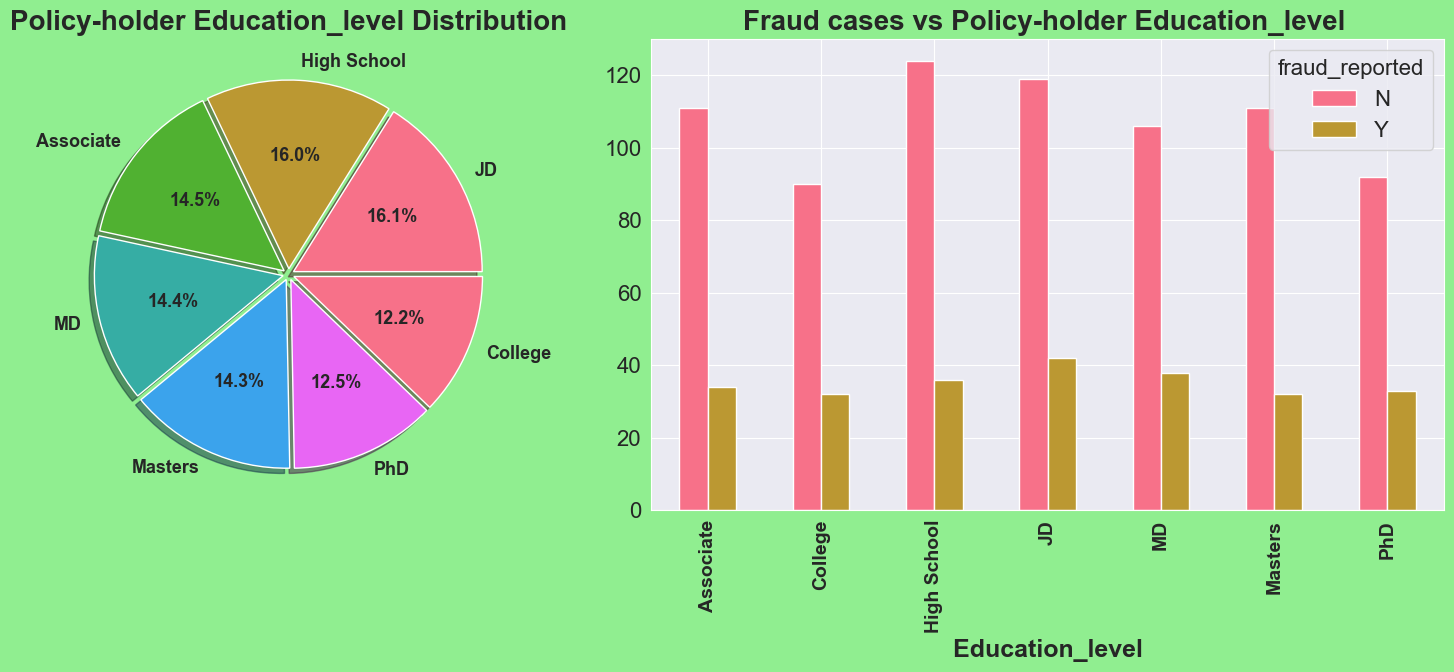

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
rainfall['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(rainfall['insured_education_level'], rainfall['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observations :
<b> We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD. 
Education Level is not much important variable for us !!! </b>

### Occupation of Insured Customers

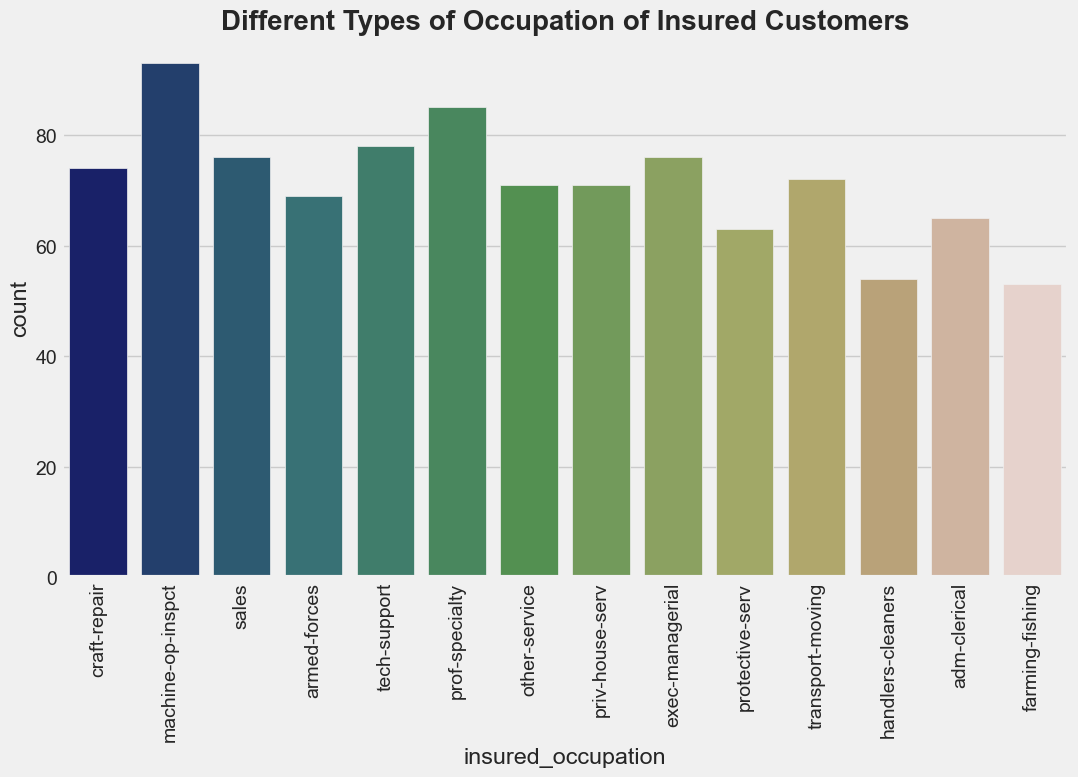

In [34]:
# let's check the insured occupation
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(rainfall['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

### Hobbies of Insured Customers

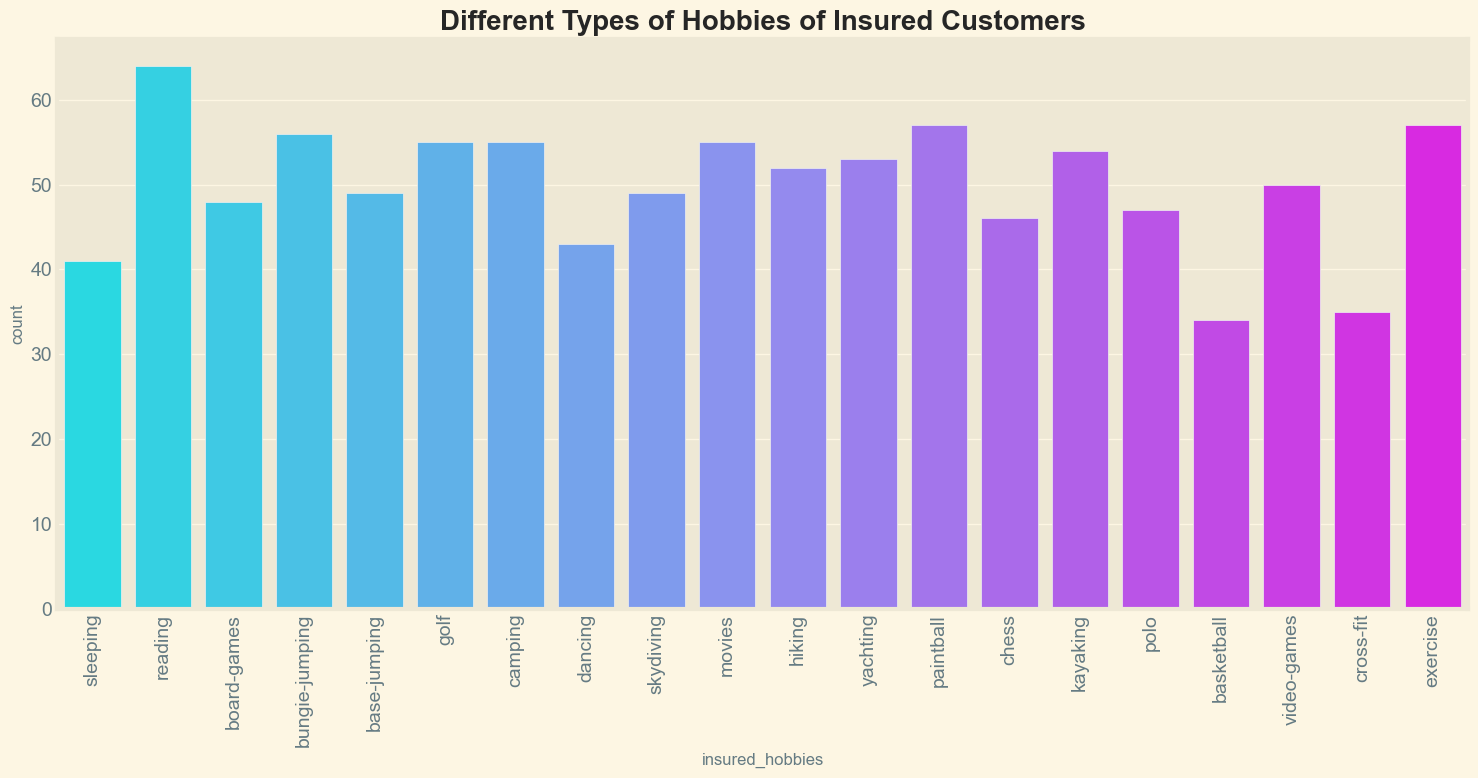

In [35]:
# let's check the insured hobbies
plt.style.use('Solarize_Light2')
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(rainfall['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 

### Different Types of Incidents Vs Fraud cases

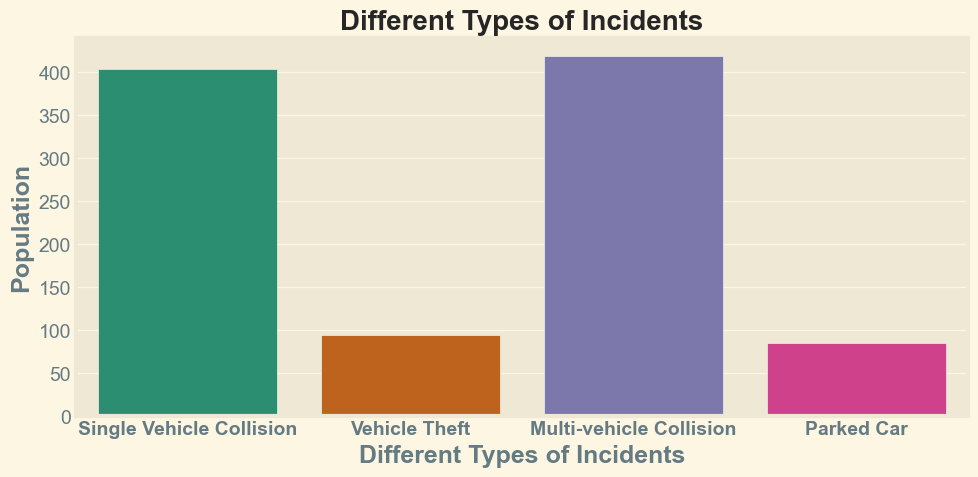

In [36]:
# let's check the incident types
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(rainfall['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

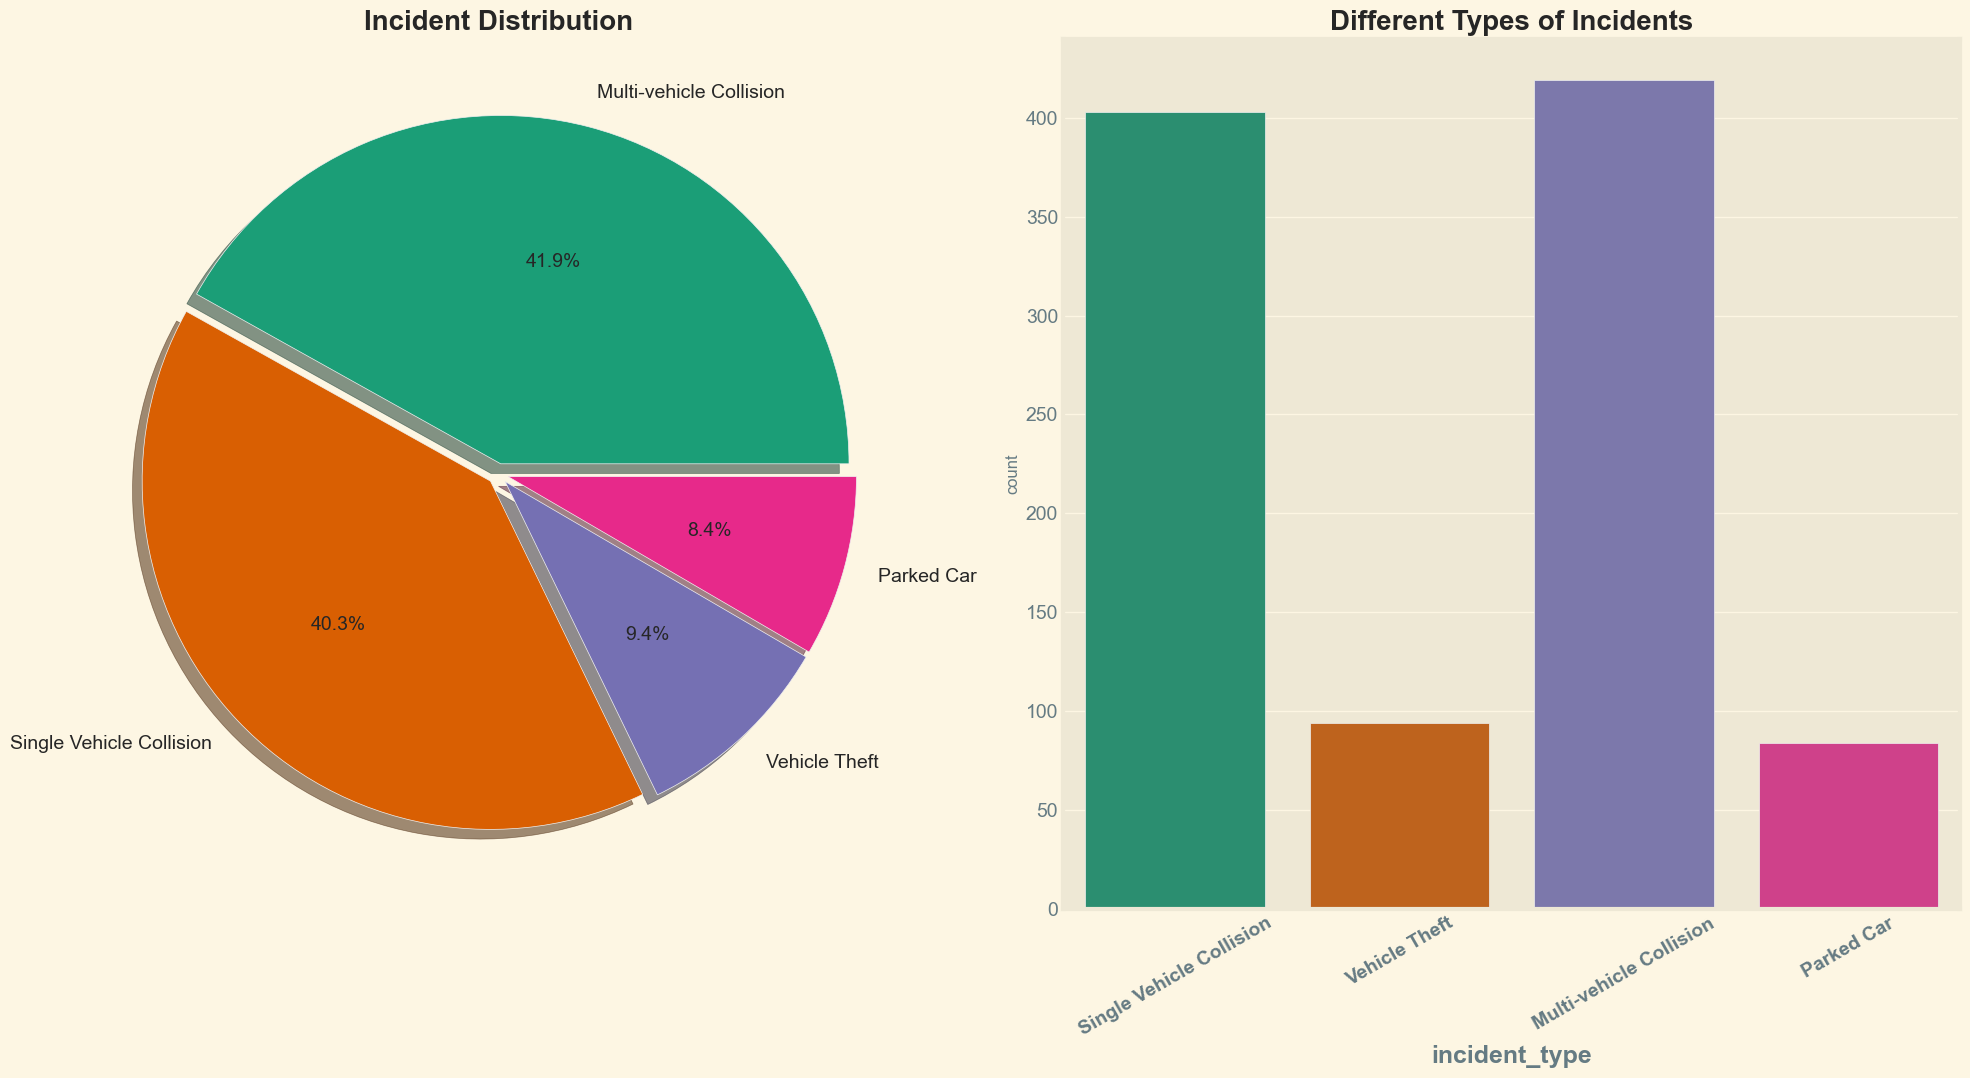

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
rainfall['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('incident_type',data=rainfall,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()

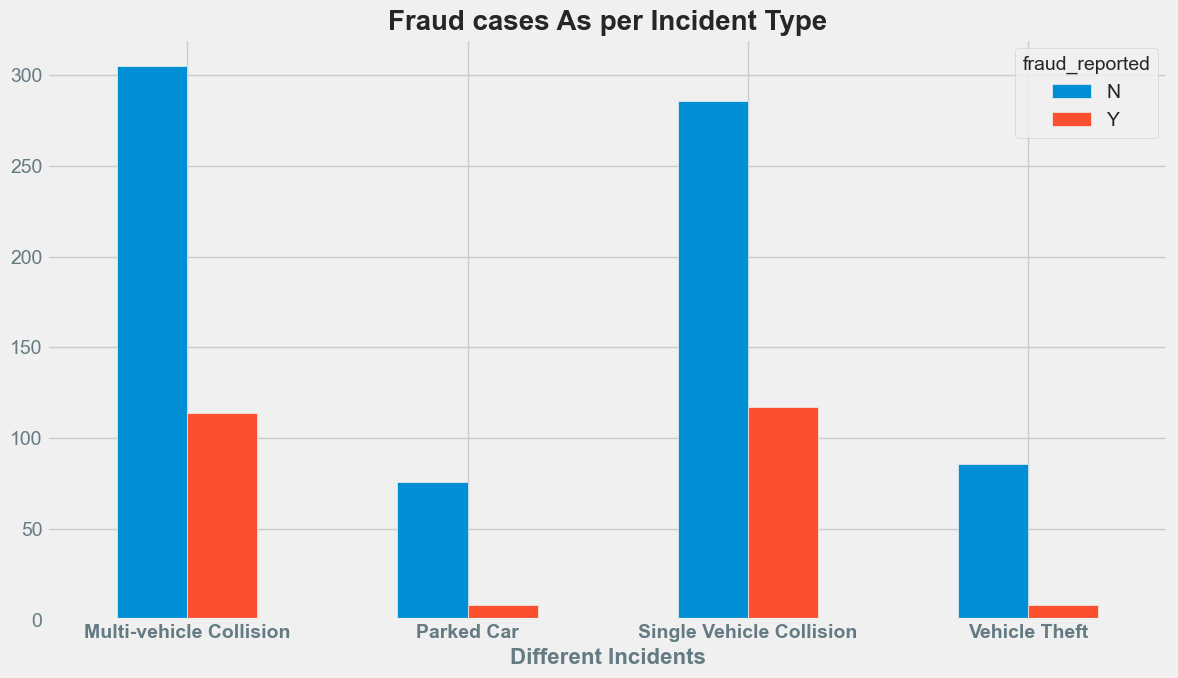

In [38]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(rainfall['incident_type'], rainfall['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

#### Observation :
- Most of case comes from Multi-vehicle and single vehicle collision.
- Some claims are due to automobile robbery.
- <b> <u> One claim out of three claim is fraud </u> in multi or single vehicle collision incident.</b>

<b><em> It will be interesting to figure out collision type and severity for different incident and corresponding fraud claim. </em></b>

### Exploration of  different Collision 

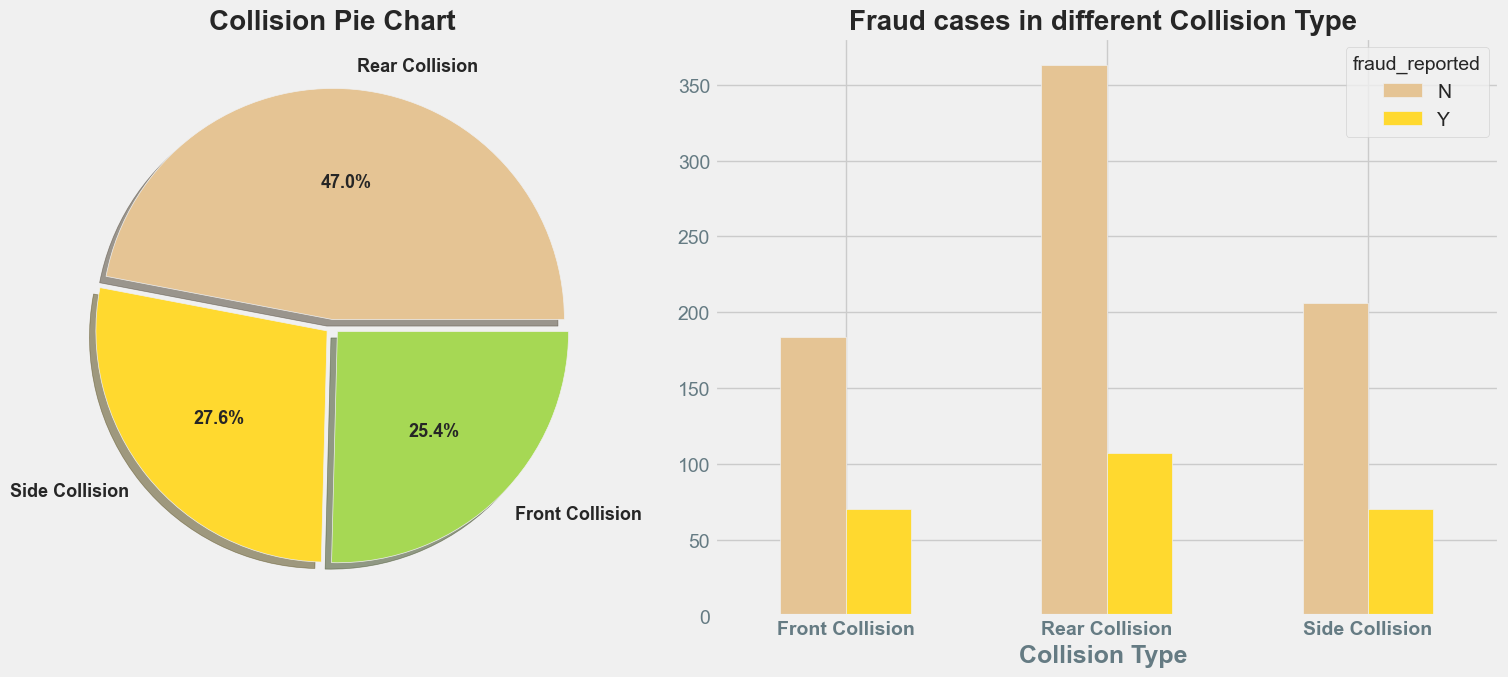

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
rainfall['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(rainfall['collision_type'], rainfall['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

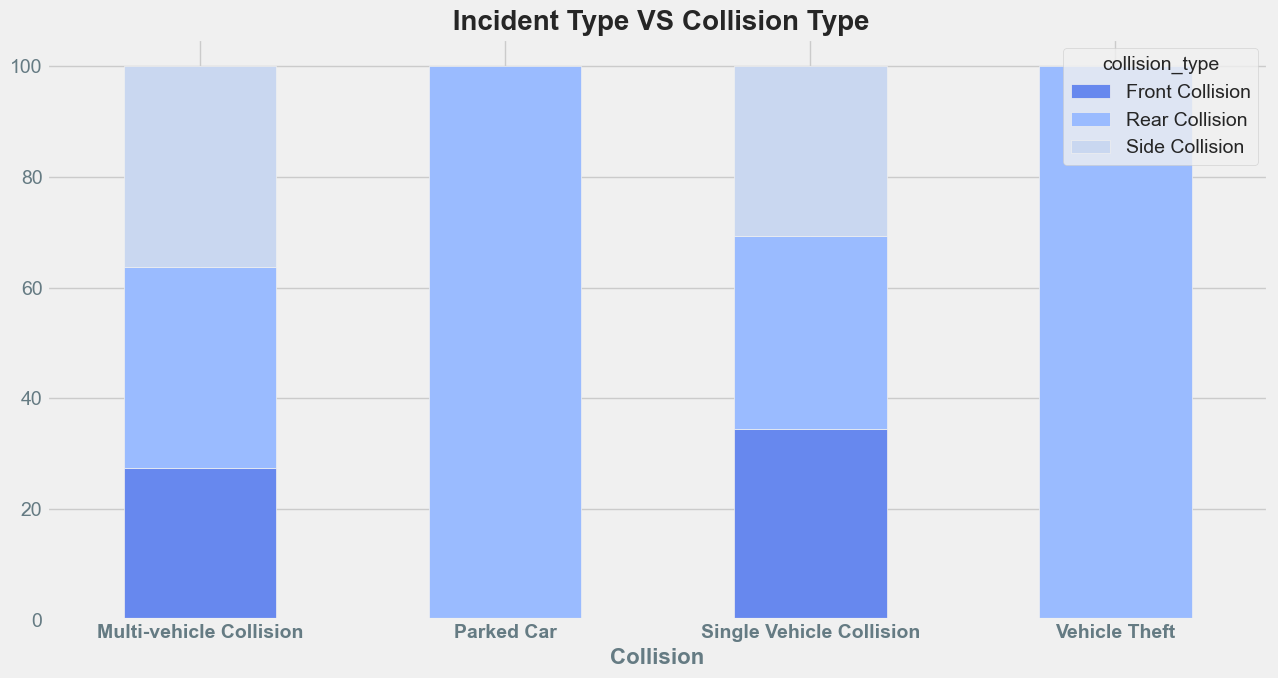

In [40]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(rainfall['incident_type'], rainfall['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

### Collision VS Incident Severity

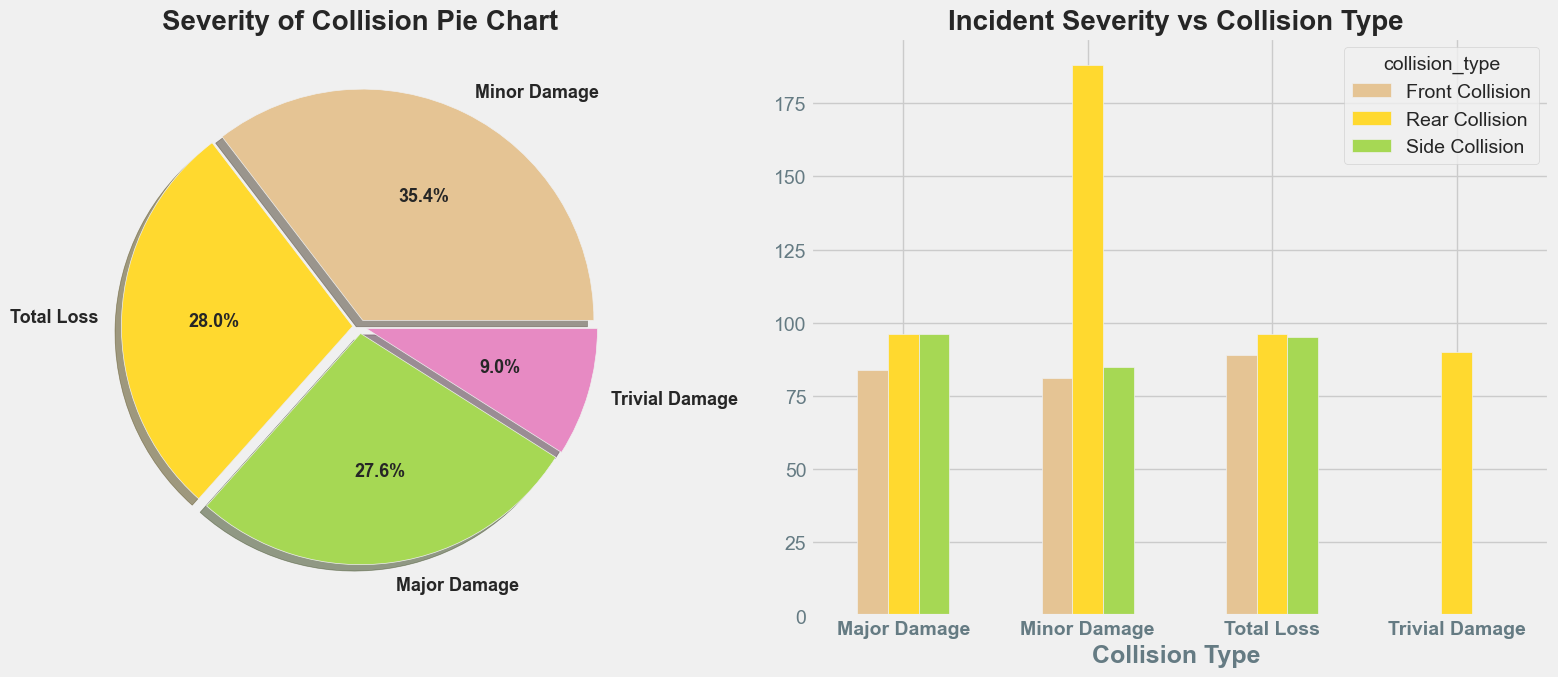

In [41]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
rainfall['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(rainfall['incident_severity'], rainfall['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Let check another plot of Incident Type VS Severity of collision to gain more insight.

In [42]:
pd.crosstab(rainfall['incident_type'], rainfall['incident_severity']).style.background_gradient(cmap='summer_r')

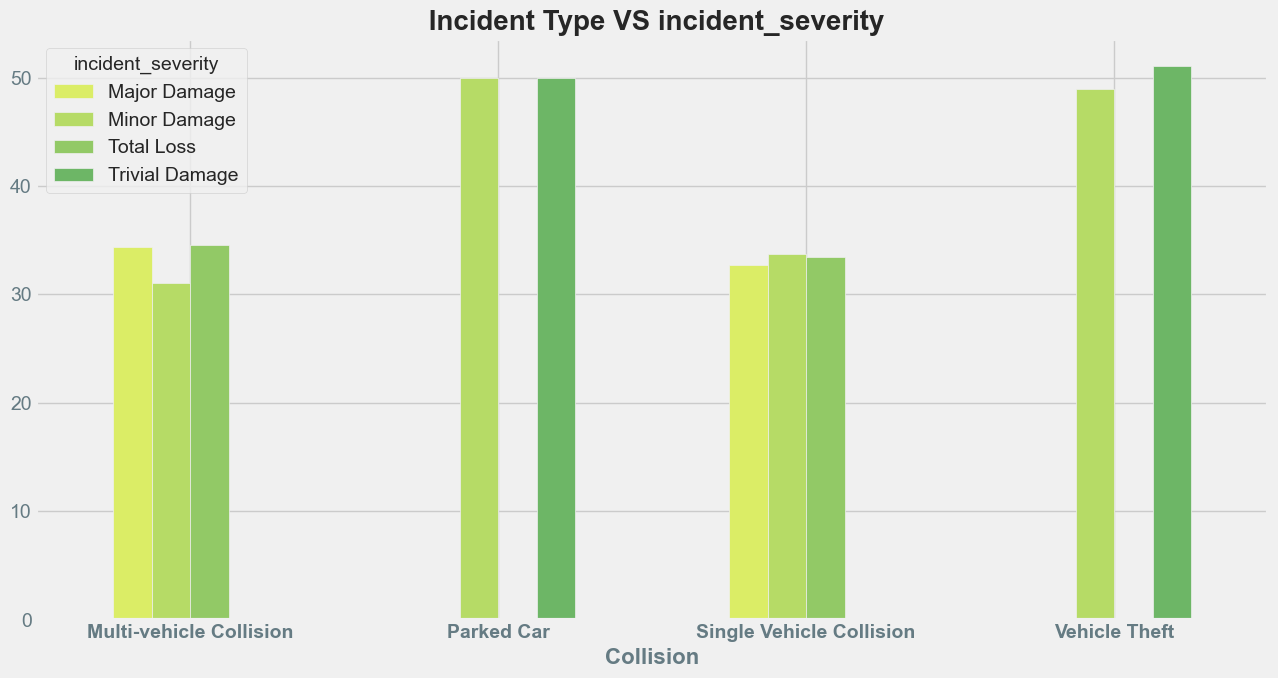

In [43]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(rainfall['incident_type'], rainfall['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

### It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.

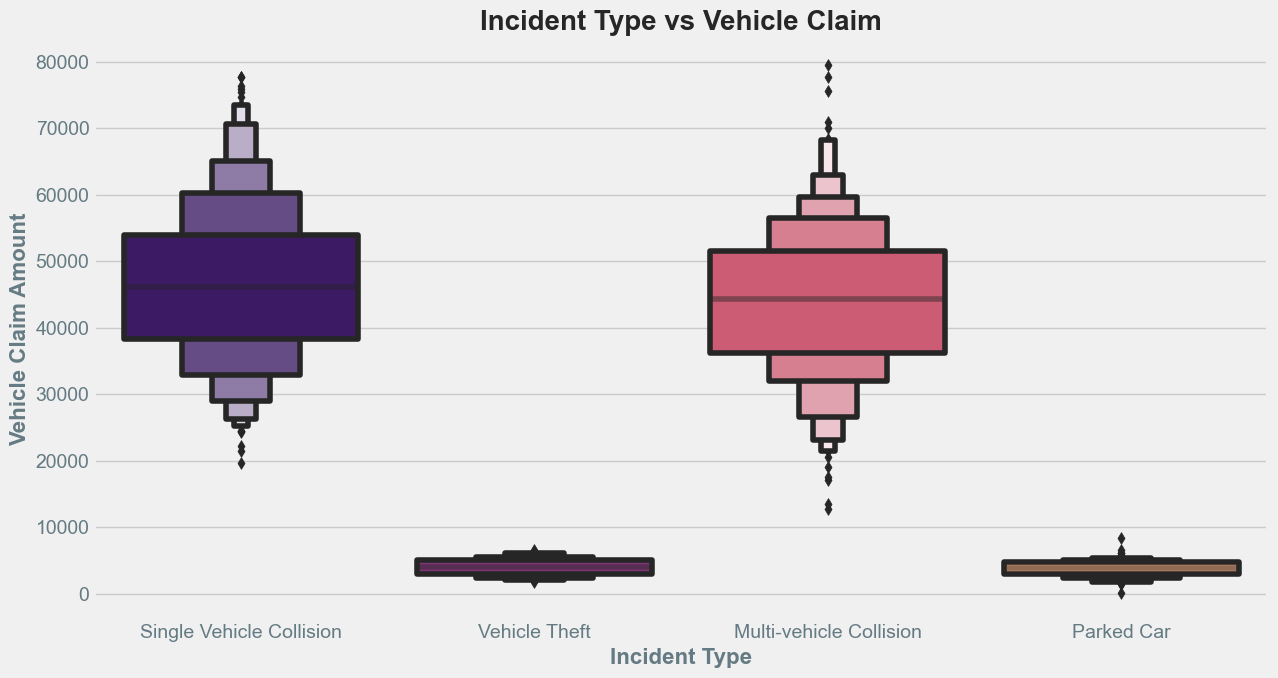

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(rainfall['incident_type'], rainfall['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

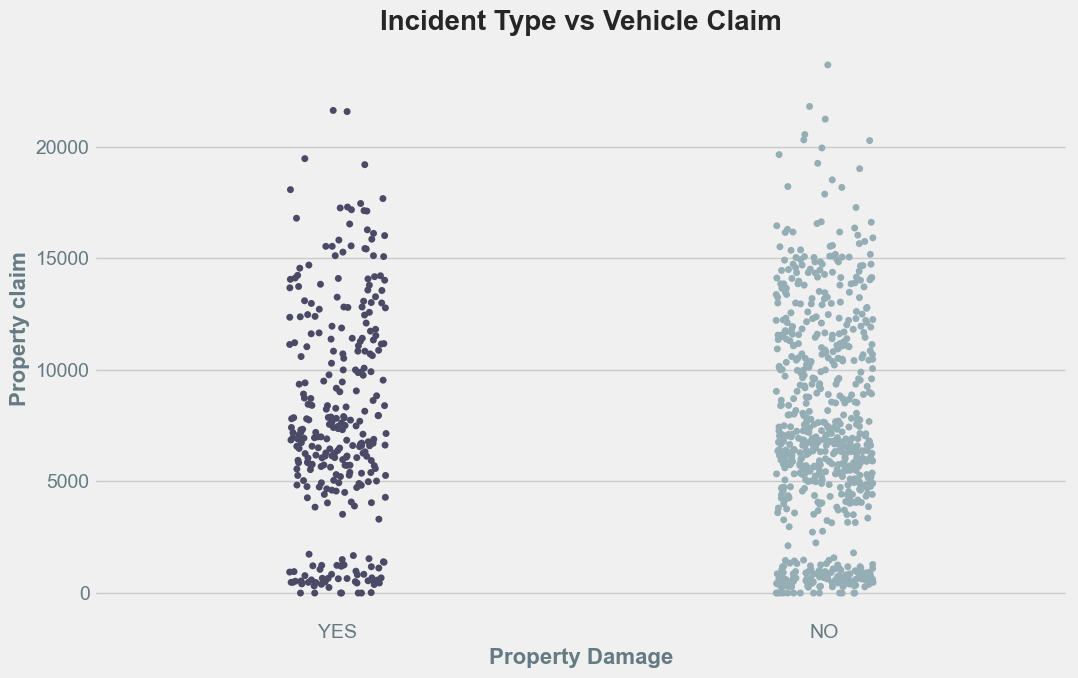

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(rainfall['property_damage'], rainfall['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

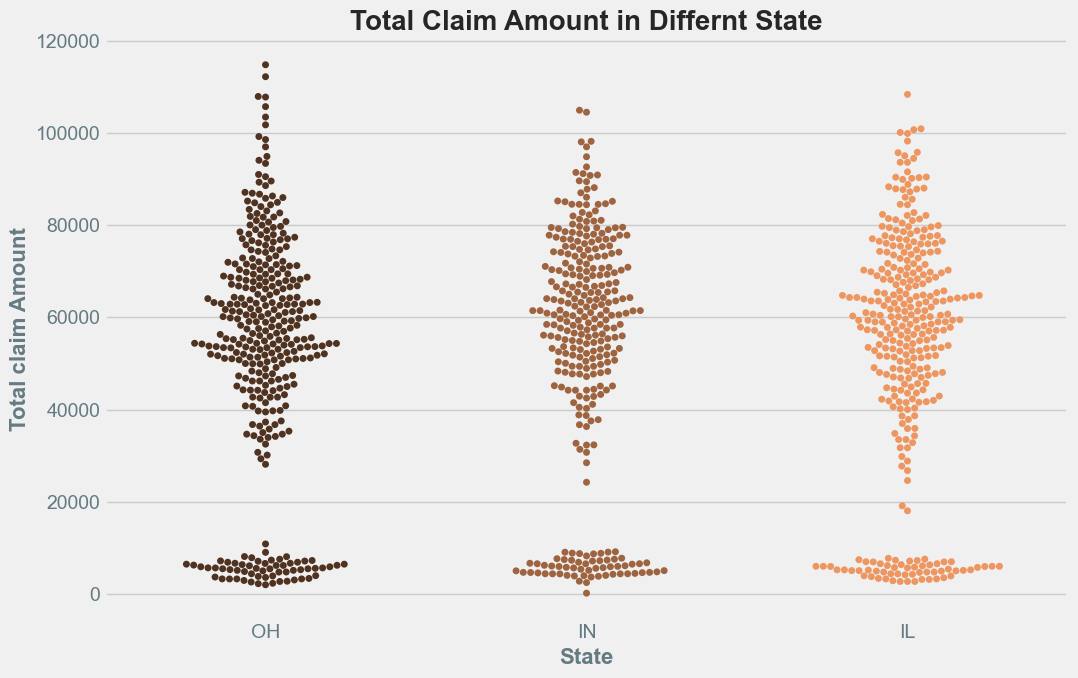

In [46]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(rainfall['policy_state'], rainfall['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

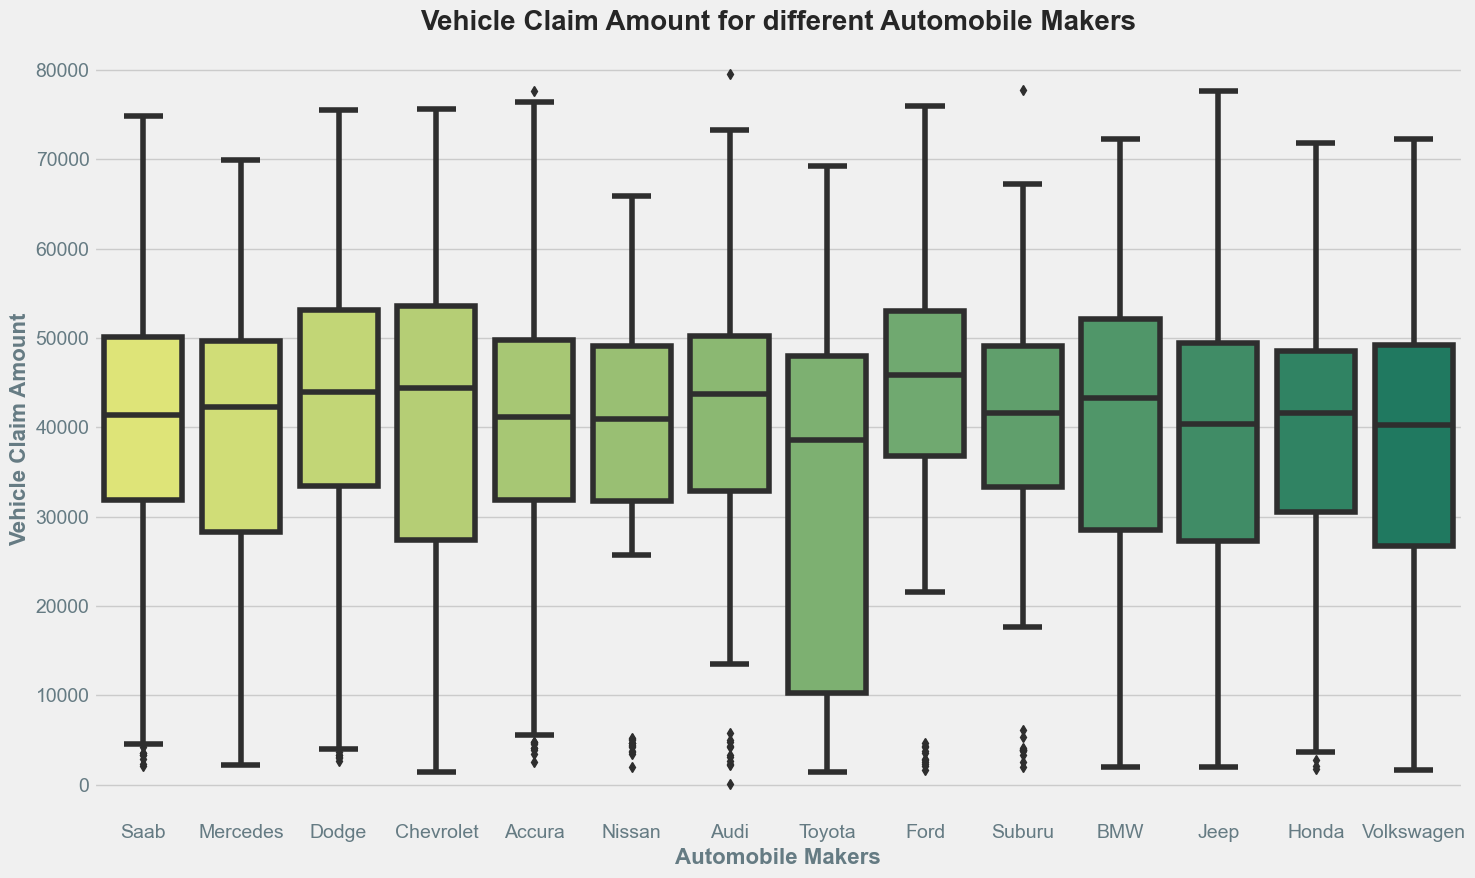

In [47]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(rainfall['auto_make'], rainfall['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

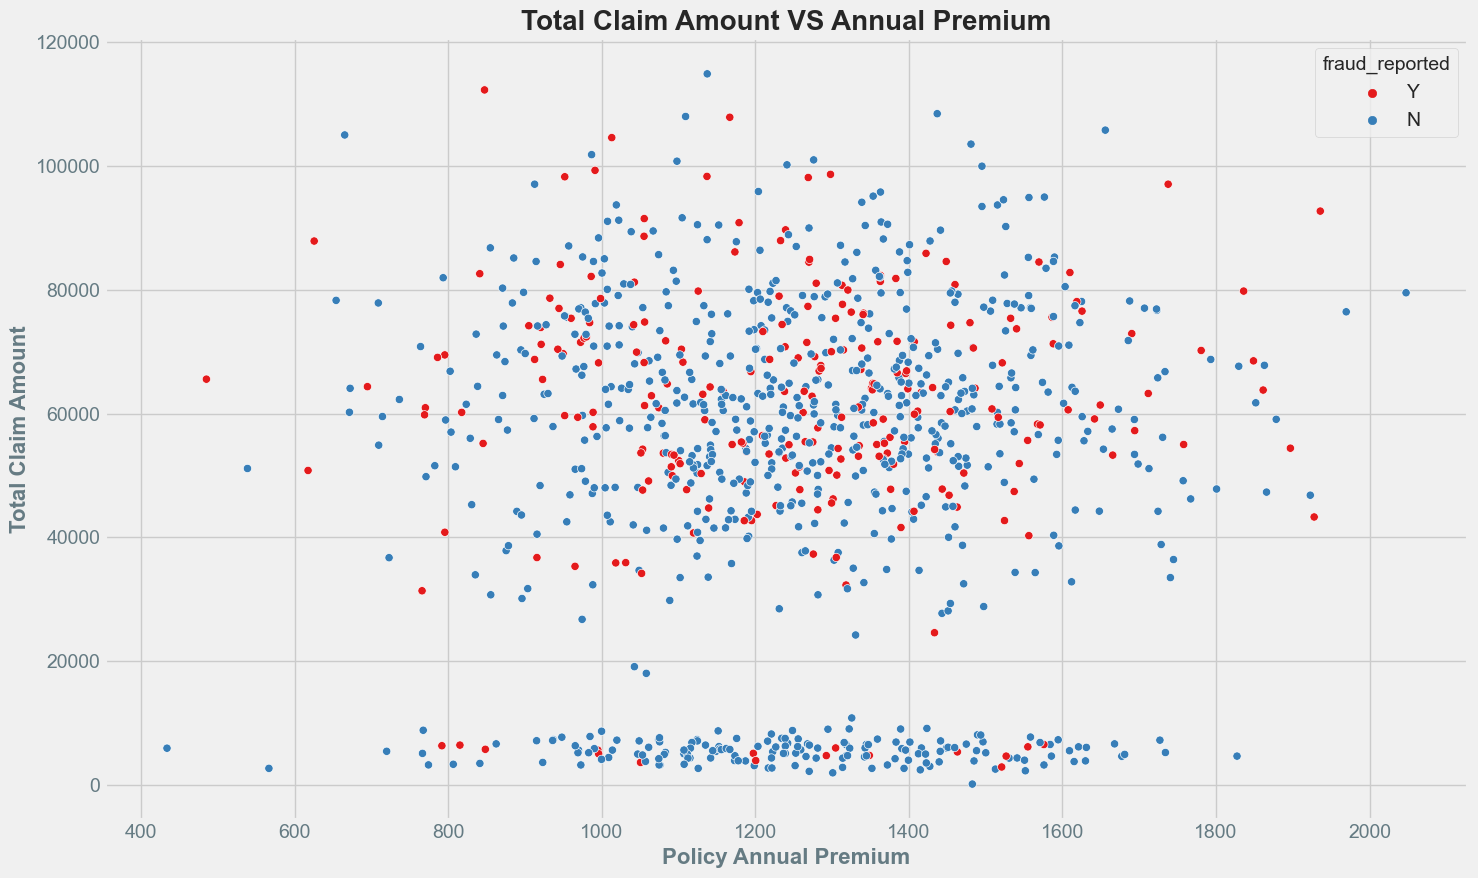

In [48]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(rainfall['policy_annual_premium'], rainfall['total_claim_amount'], hue=rainfall.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

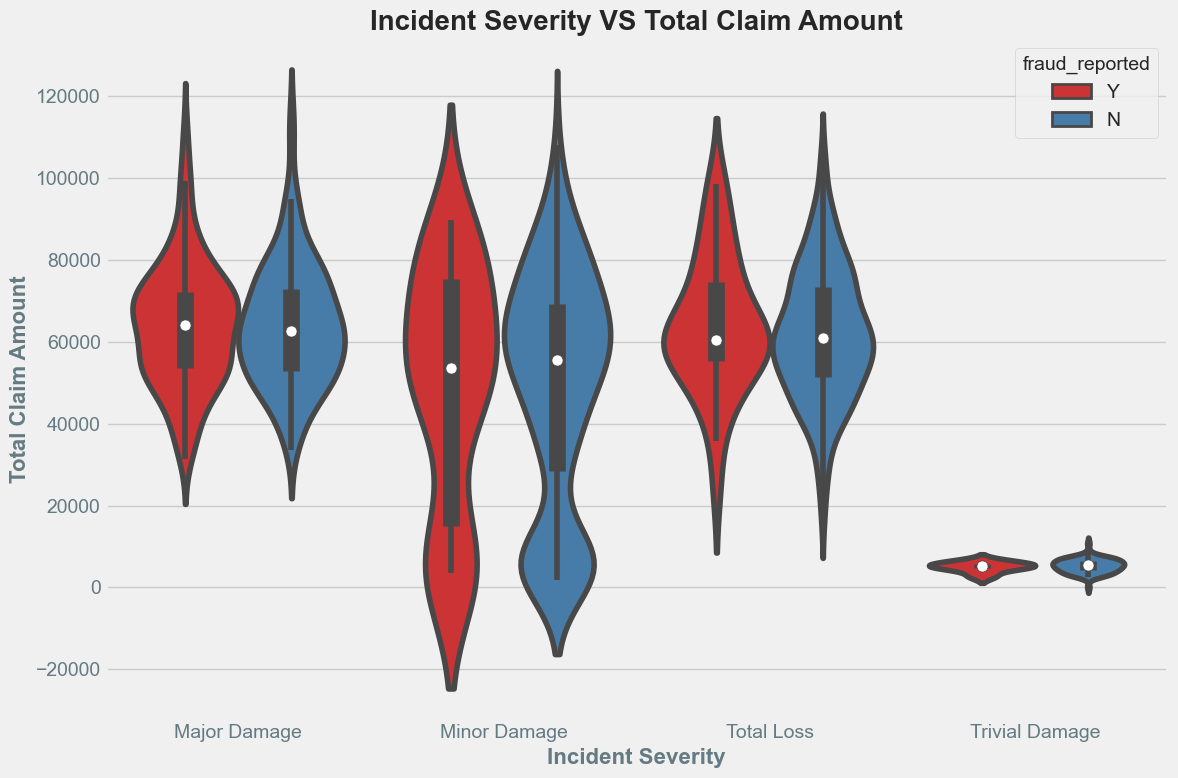

In [49]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(rainfall['incident_severity'], rainfall['total_claim_amount'], hue=rainfall.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [50]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
rainfall.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

  fraud_reported CSL_Personal CSL_Accidental  policy_bind_day  \
0              Y          250            500               17   
1              Y          250            500               27   
2              N          100            300                9   
3              Y          250            500               25   
4              N          500           1000                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25      

# Encoding categorical data

In [51]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [52]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    rainfall[i] = le.fit_transform(rainfall[i])
rainfall.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0           1               1             1               2               17   
1          12               1             1               2               27   
2          30               0             0               1                9   
3          34               1             1               2               25   
4          31               0             2               0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              

# Feature selection and Engineering

## 1. Outliers Detection and Removal

In [53]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [54]:
len(Numerical)

21

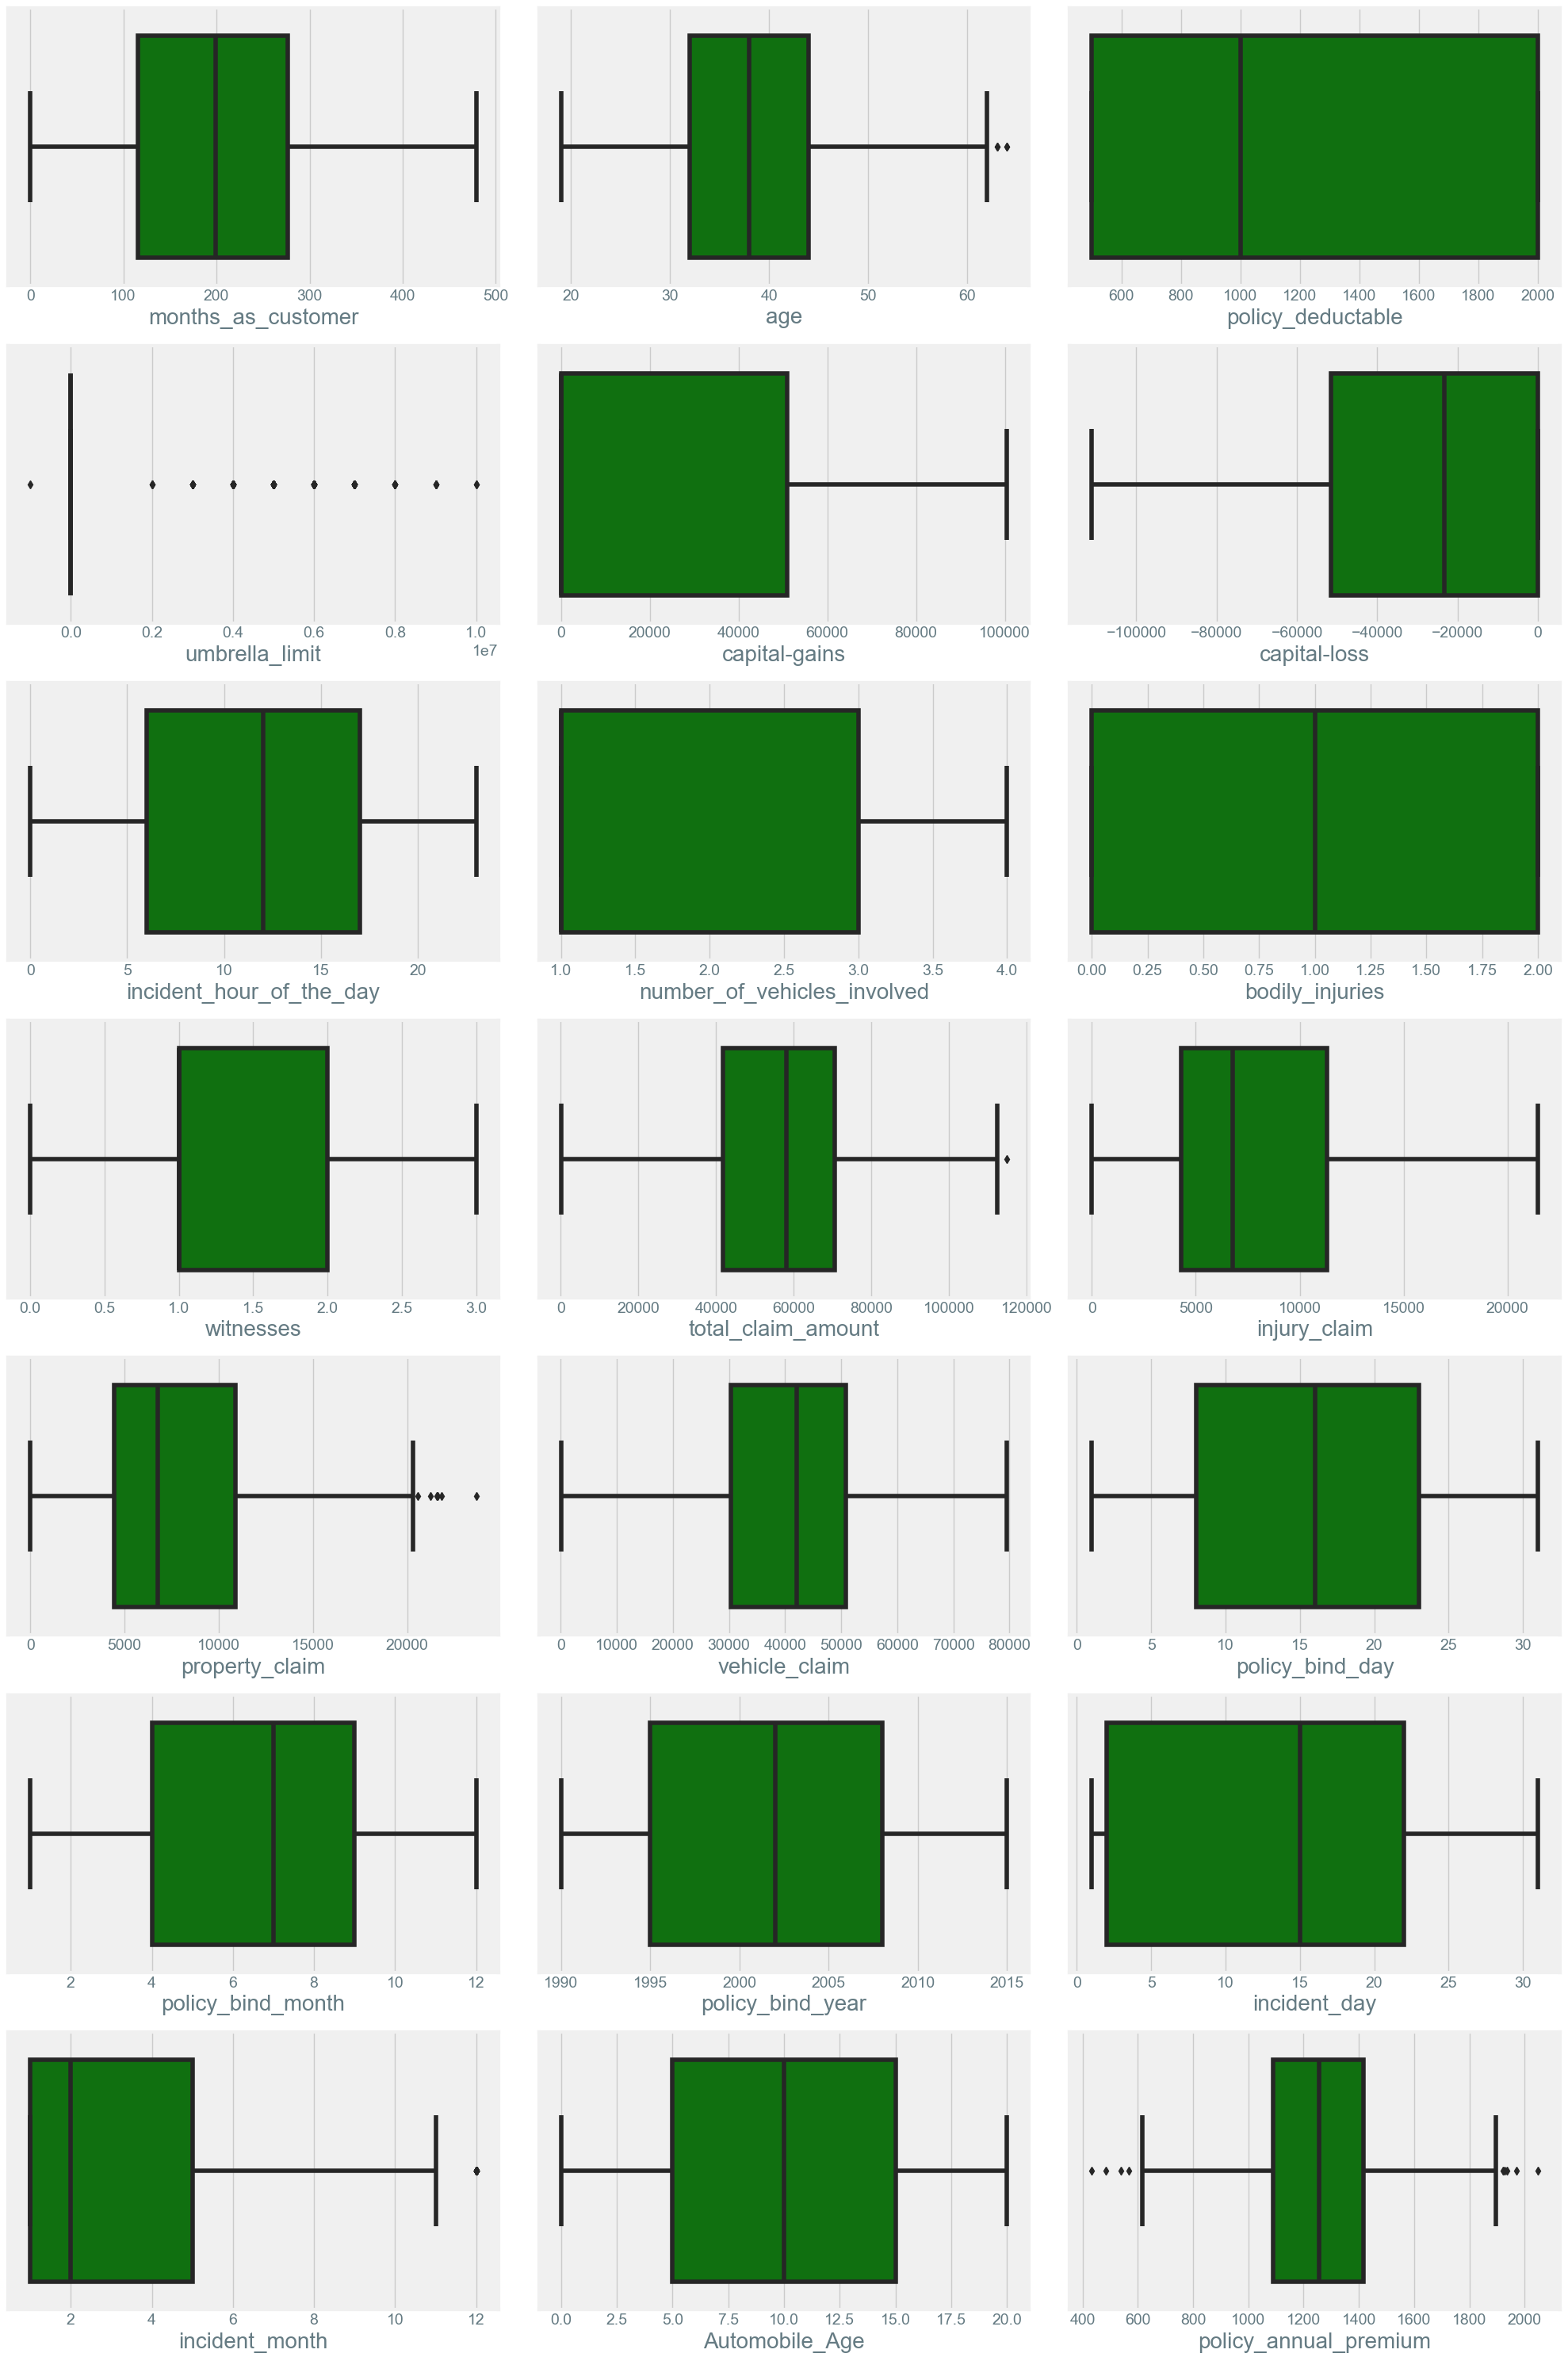

In [55]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(rainfall[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> From Boxplot we can see outliers exist dataset.</b>

### Outliers removal using Zscore method

In [56]:
from scipy.stats import zscore
rainfall.drop(["age_bins"], axis=1, inplace=True)
z = np.abs(zscore(rainfall))
threshold = 3
rainfall1 = rainfall[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", rainfall.shape)
print ("Shape of the dataframe after removing outliers: ", rainfall1.shape)
print ("Percentage of data loss post outlier removal: ", (rainfall.shape[0]-rainfall1.shape[0])/rainfall.shape[0]*100)

rainfall=rainfall1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


In [57]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1000-980)/1000)*100,'%')

Percentage Data Loss : 2.0 %


## 2.  Skewness of features

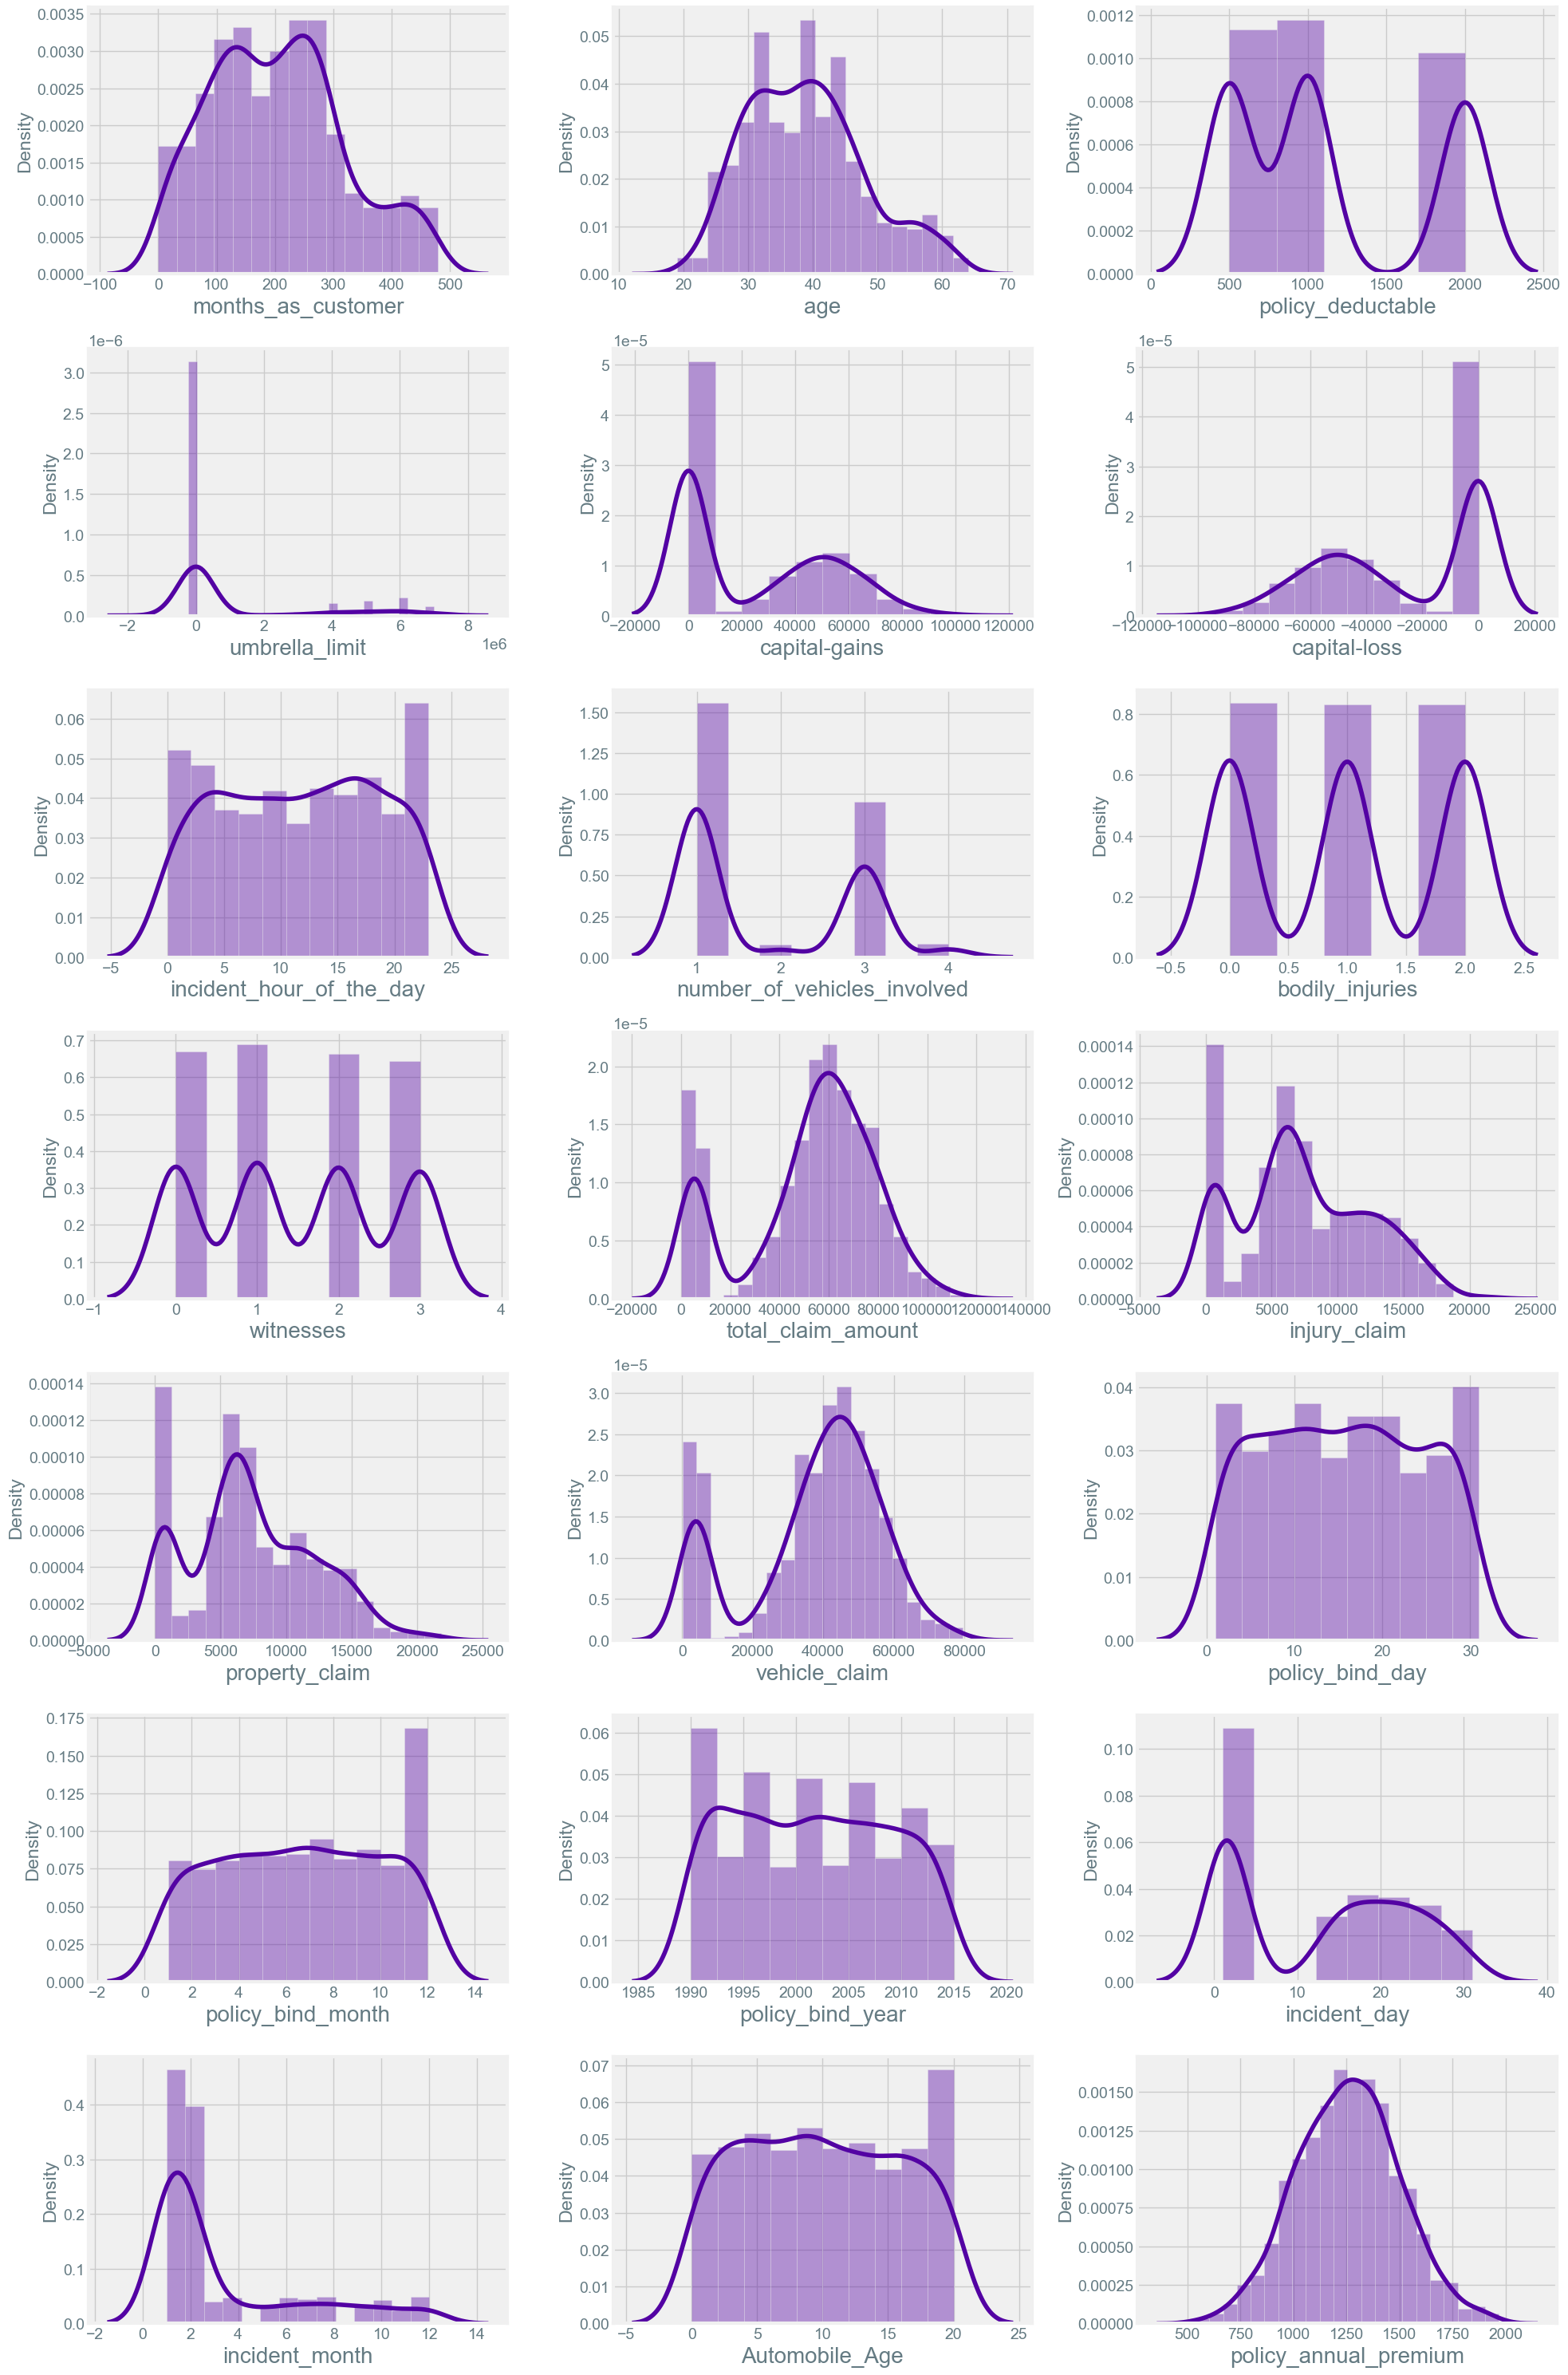

In [58]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(rainfall[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

- **We also going to ignore sknewness in target feature.**

In [59]:
rainfall[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

- **Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.**

- **We will use yeo-johnson method to transform negatively skewed data.**


In [60]:
import numpy, warnings
numpy.warnings= warnings
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
rainfall[skew] = scaler.fit_transform(rainfall[skew].values)

#### Checking Skewness after transformation

In [61]:
rainfall[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

**For 'total_claim_amount','vehicle_claim' skewness has not been removed but it got reduced**

## 3. Corrleation 

In [62]:
rainfall.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007183   
age                                    0.922960  1.000000     -0.020012   
policy_state                          -0.007183 -0.020012      1.000000   
policy_deductable                      0.031041  0.032036      0.017612   
policy_annual_premium                 -0.003814  0.005330      0.015089   
umbrella_limit                         0.018213  0.013256     -0.010921   
insured_sex                            0.059644  0.073790     -0.018002   
insured_education_level               -0.000731  0.001647     -0.027173   
insured_occupation                     0.006925  0.014798     -0.025357   
insured_hobbies                       -0.089358 -0.079099     -0.039501   
insured_relationship                   0.071492  0.076129     -0.017060   
capital-gains                          0.007468 -0.004529      0.068619   
capital-loss                           0.023041  0.012860     -0.031926   
incident_type                         -0.016746 -0.026286      0.032373   
collision_type                        -0.073031 -0.076325      0.049961   
incident_severity                     -0.064094 -0.064396     -0.028353   
authorities_contacted                  0.013782  0.018441     -0.014647   
incident_state                         0.015811  0.012644      0.019456   
incident_city                         -0.006601 -0.006685     -0.002809   
incident_hour_of_the_day               0.066198  0.083720      0.021926   
number_of_vehicles_involved            0.011831  0.020391     -0.045514   
property_damage                       -0.000630 -0.008239     -0.013576   
bodily_injuries                       -0.007674 -0.012254      0.012097   
witnesses                              0.063574  0.056360      0.025838   
police_report_available               -0.017200 -0.018135      0.065316   
total_claim_amount                     0.059338  0.068448     -0.015056   
injury_claim                           0.065062  0.077149     -0.048188   
property_claim                         0.036660  0.062375     -0.006420   
vehicle_claim                          0.056360  0.059129     -0.006411   
auto_make                              0.049734  0.033757      0.010259   
auto_model                             0.005130  0.015322     -0.018008   
fraud_reported                         0.021285  0.013279      0.034587   
CSL_Personal                          -0.021855 -0.013323      0.001653   
CSL_Accidental                         0.007121  0.011258      0.029007   
policy_bind_day                        0.050824  0.053147     -0.000583   
policy_bind_month                      0.004207  0.014492      0.073692   
policy_bind_year                      -0.041914 -0.031709     -0.003045   
incident_day                          -0.010538 -0.005843      0.016049   
incident_month                         0.019242  0.018221      0.027889   
Automobile_Age                        -0.000869 -0.005594      0.001160   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.031041              -0.003814   
age                                   0.032036               0.005330   
policy_state                          0.017612               0.015089   
policy_deductable                     1.000000              -0.008300   
policy_annual_premium                -0.008300               1.000000   
umbrella_limit                        0.013471              -0.014107   
insured_sex                          -0.006977               0.041312   
insured_education_level               0.014101              -0.021400   
insured_occupation                   -0.053888               0.027827   
insured_hobbies                      -0.001923              -0.014226   
insured_relationship                 -0.019000               0.004417   
capital-gains                         0.031673              -0.006807   
capi

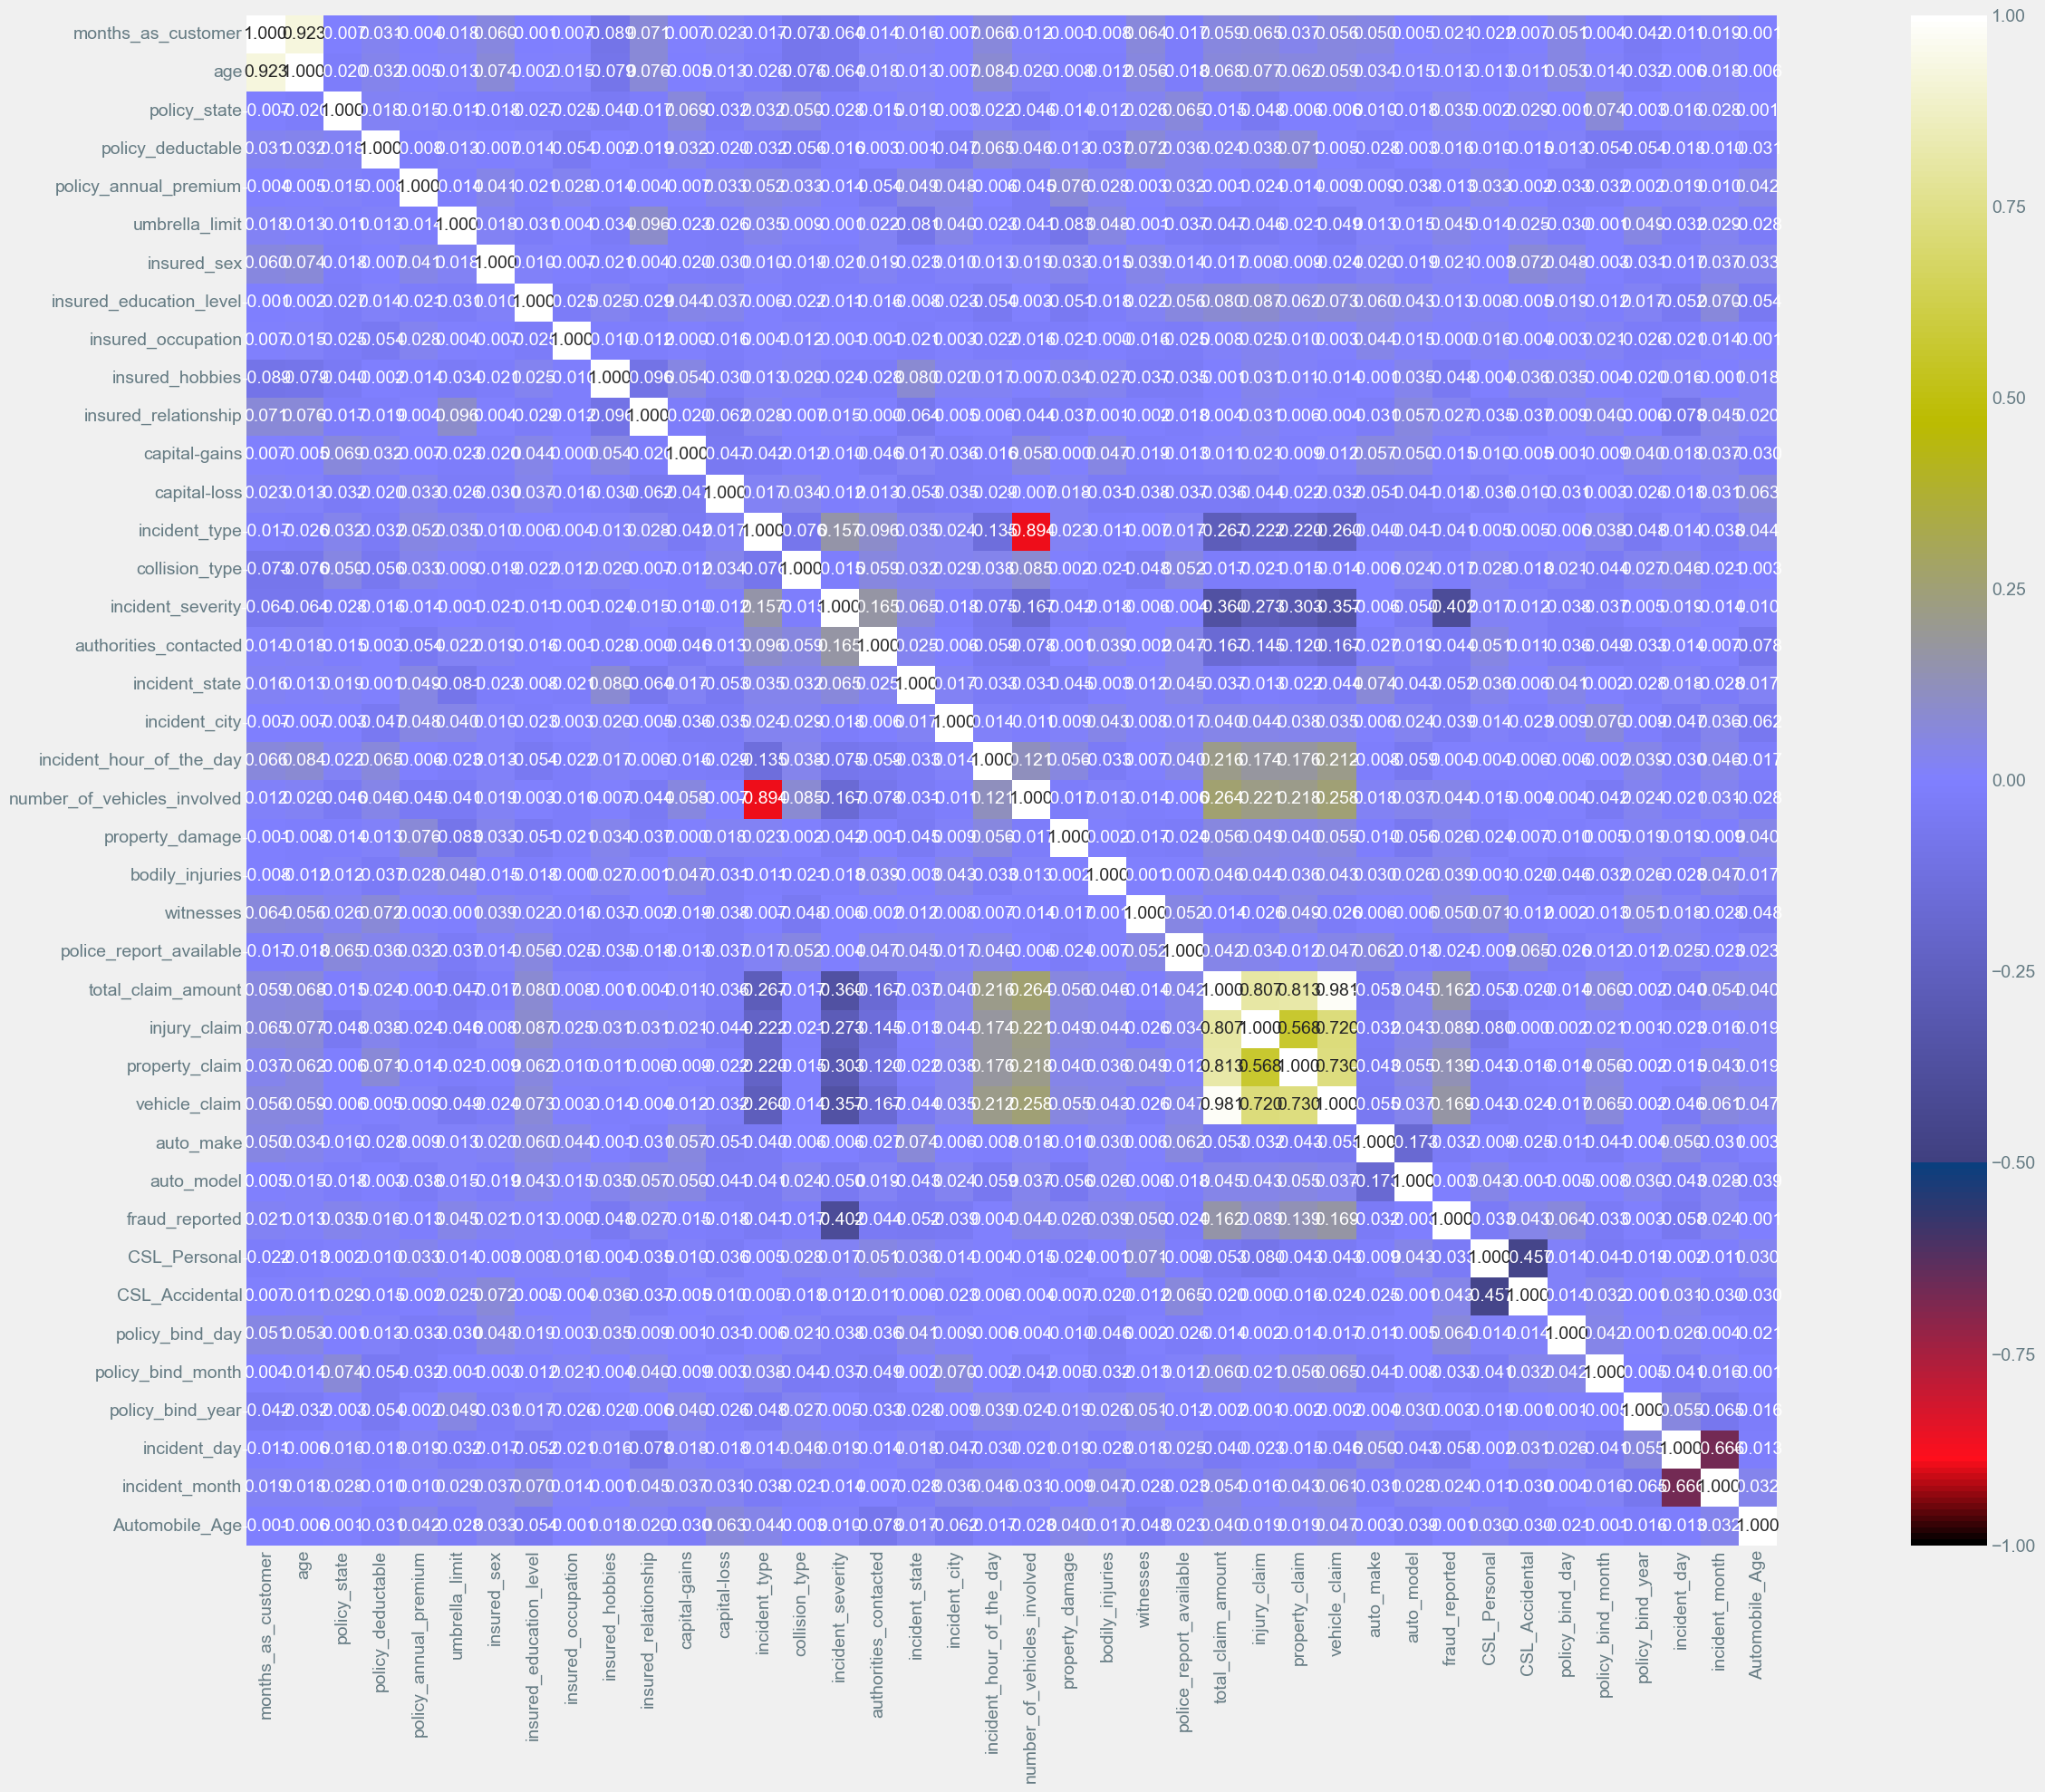

In [63]:
plt.figure(figsize=(30,20))
sns.heatmap(rainfall.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

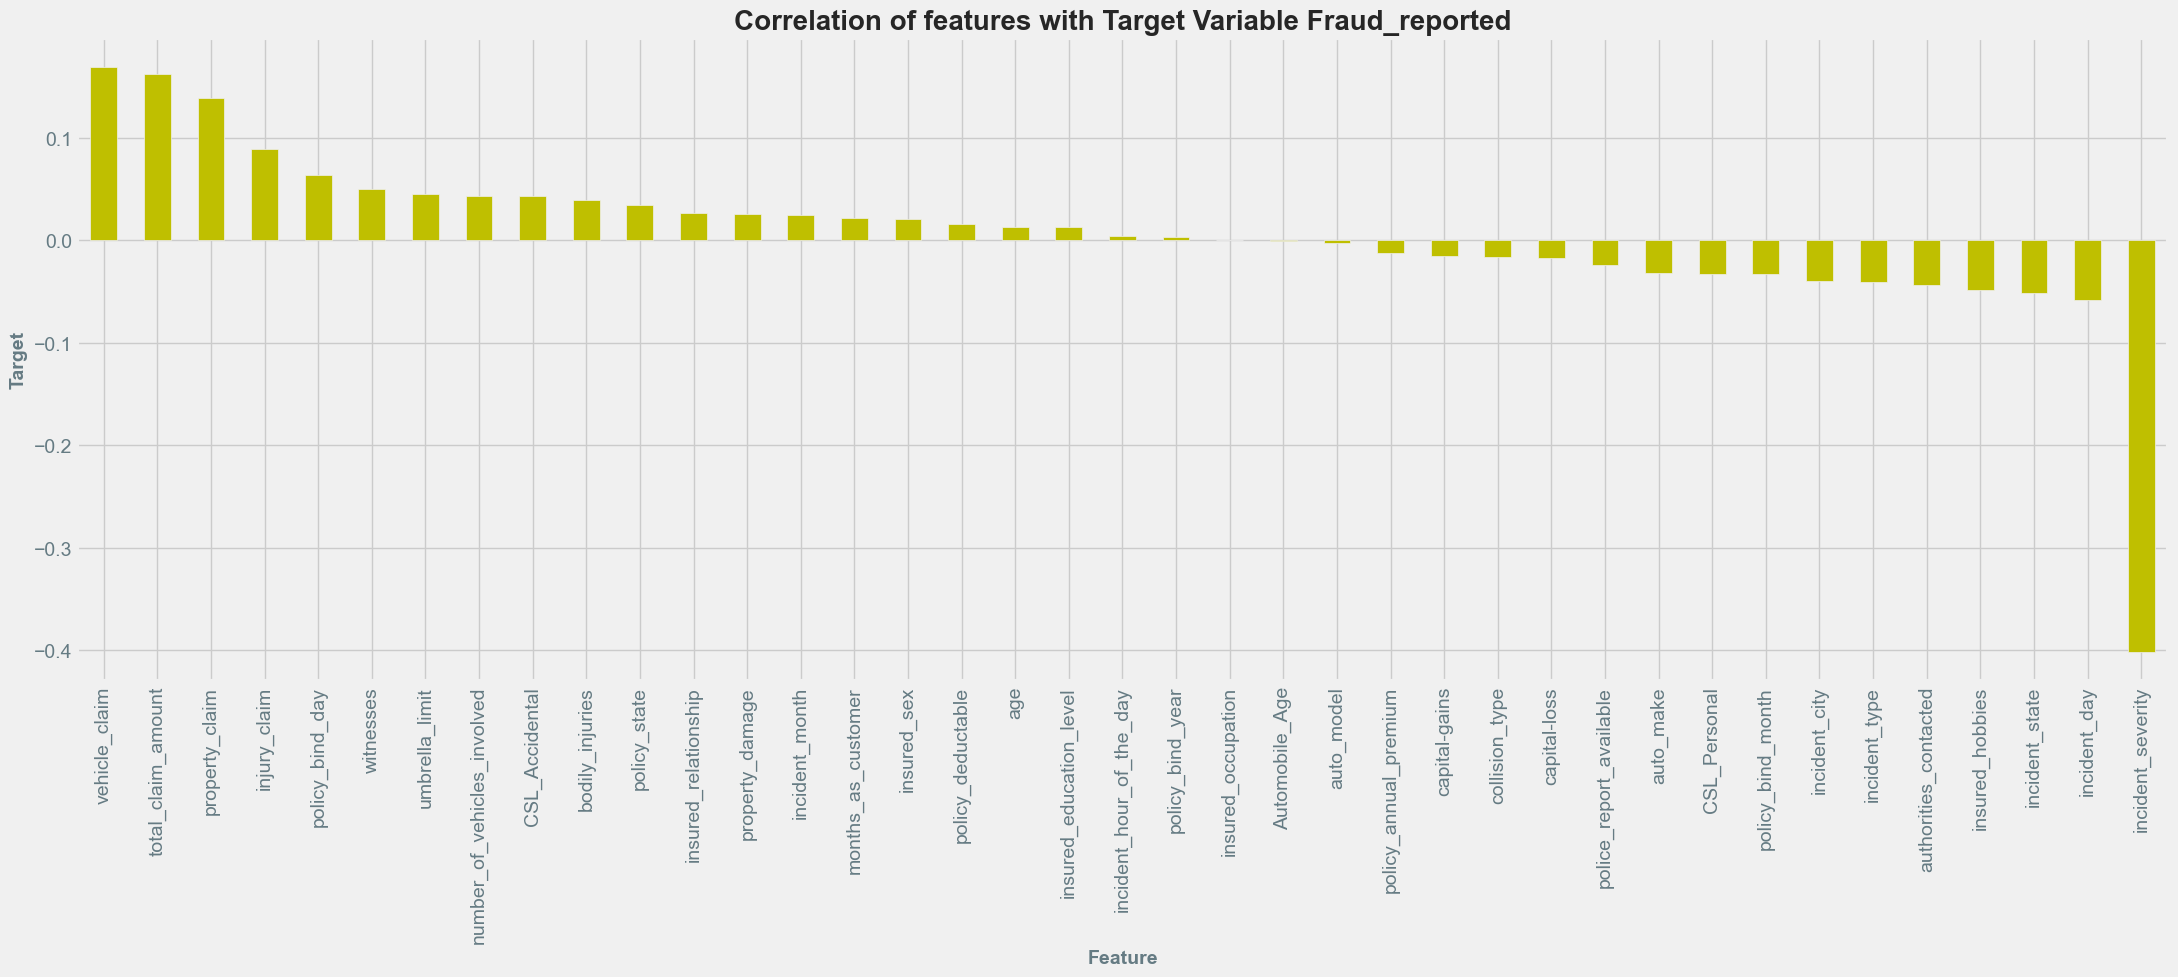

In [64]:
plt.figure(figsize=(22,10))
rainfall.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

#### Observation:
- **incident_severity is correlated with target variable with correlation of 0.4. Other variable are poorly correlated with target variable.**
- Other variable are poorly correlated with target variable.
- injury_claim,property_claim,vehicle_claim are highly correlated with each other.
- **incident_hour_of_the_day is highly negative correlated with incident type.**

## 4. Balanceing Imbalanced target feature

In [65]:
rainfall.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
# Splitting data in target and dependent feature
X = rainfall.drop(['fraud_reported'], axis =1)
Y = rainfall['fraud_reported']

In [68]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [69]:
Y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

 ## 5. Checking Multicollinearity between features using variance_inflation_factor

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0       7.191488           months_as_customer
1       7.138351                          age
2       1.065438                 policy_state
3       1.061894            policy_deductable
4       1.047096        policy_annual_premium
5       1.050823               umbrella_limit
6       1.084846                  insured_sex
7       1.055249      insured_education_level
8       1.040709           insured_occupation
9       1.074561              insured_hobbies
10      1.068658         insured_relationship
11      1.067138                capital-gains
12      1.071112                 capital-loss
13      3.649368                incident_type
14      1.096970               collision_type
15      1.368535            incident_severity
16      1.112709        authorities_contacted
17      1.091707               incident_state
18      1.057676                incident_city
19      1.117909     incident_hour_of_the_day
20      3.537019  number_of_vehicles_involved
21      1.058657              property_damage
22      1.054999              bodily_injuries
23      1.069072                    witnesses
24      1.097503      police_report_available
25  42053.393417           total_claim_amount
26   1635.325523                 injury_claim
27   1701.270763               property_claim
28  20808.131208                vehicle_claim
29      1.085136                    auto_make
30      1.088986                   auto_model
31      1.250636                 CSL_Personal
32      1.221316               CSL_Accidental
33      1.037654              policy_bind_day
34      1.066150            policy_bind_month
35      1.041716             policy_bind_year
36      1.826125                 incident_day
37      1.816760               incident_month
38      1.055979               Automobile_Age

#### Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.  </b>


## Principle Component Analysis

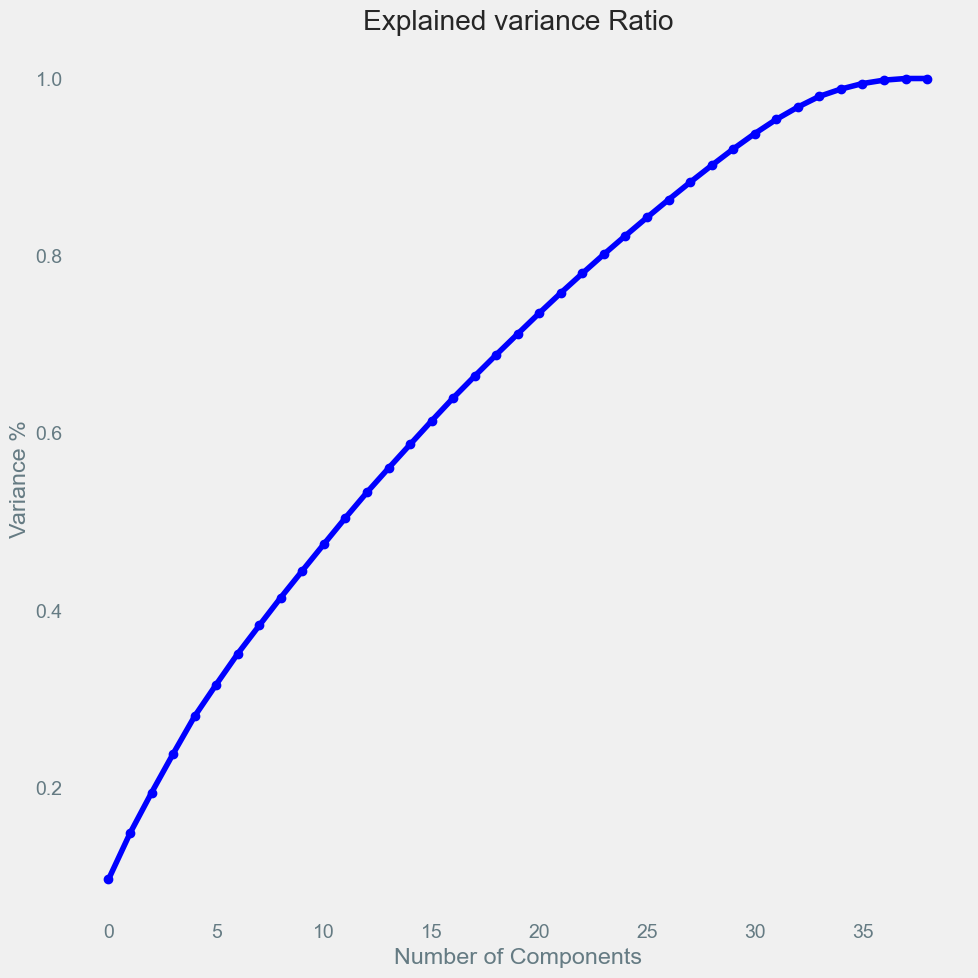

In [72]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Observations -
<b> AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data.  We shall pick the first 28 components for our prediction. </b>

In [73]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [74]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Machine Learning Model Building

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1036, 28)
Training target vector size: (1036,)
Test feature matrix size: (444, 28)
Test target vector size: (444,)


### Finding best Random state

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8130630630630631 on Random_state 127


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7882882882882883


Confusion matrix of Logistics Regression : 
 [[172  55]
 [ 39 178]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       227
           1       0.76      0.82      0.79       217

    accuracy                           0.79       444
   macro avg       0.79      0.79      0.79       444
weighted avg       0.79      0.79      0.79       444



In [79]:
### Finding Optimal value of n_neighbors for KNN

In [80]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4931969619160719
RMSE value for k=  2 is: 0.4722001408015175
RMSE value for k=  3 is: 0.5220368976638744
RMSE value for k=  4 is: 0.4931969619160719
RMSE value for k=  5 is: 0.5431804903022982
RMSE value for k=  6 is: 0.5133356733303399
RMSE value for k=  7 is: 0.5655261442407591
RMSE value for k=  8 is: 0.5431804903022982
RMSE value for k=  9 is: 0.5635313368106227
RMSE value for k=  10 is: 0.5554804754071547
RMSE value for k=  11 is: 0.5812381937190964
RMSE value for k=  12 is: 0.5675139399803956
RMSE value for k=  13 is: 0.5889370482885644
RMSE value for k=  14 is: 0.5792974931635606
RMSE value for k=  15 is: 0.5946457799426509
RMSE value for k=  16 is: 0.5831724359827805
RMSE value for k=  17 is: 0.5965365503100843
RMSE value for k=  18 is: 0.5792974931635606
RMSE value for k=  19 is: 0.5908460874873414
RMSE value for k=  20 is: 0.5946457799426509


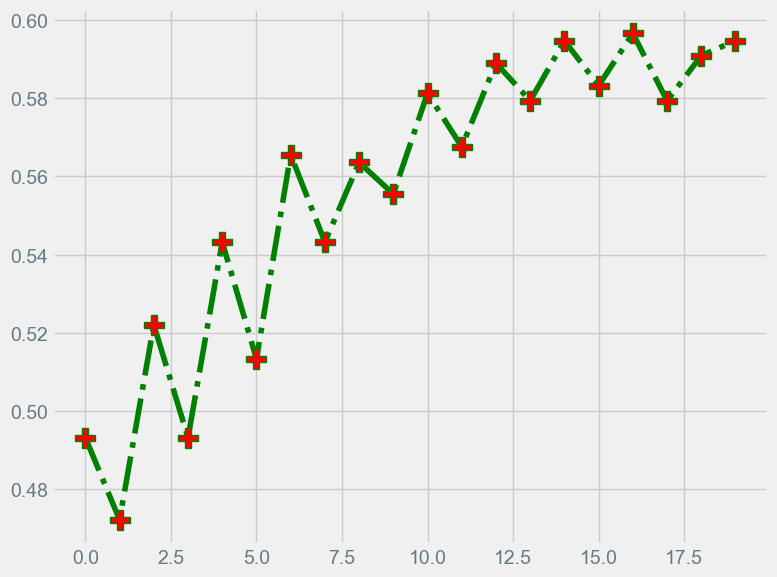

In [81]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='green', linestyle='dashdot', marker='P', markerfacecolor='red', markersize=15)

#### Observations- 
At k=2, we get the minimum RMSE value which approximately 0.4745789978762495, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case


## Applying other classification algorithm

In [82]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7882882882882883


Confusion matrix : 
 [[172  55]
 [ 39 178]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       227
           1       0.76      0.82      0.79       217

    accuracy                           0.79       444
   macro avg       0.79      0.79      0.79       444
weighted avg       0.79      0.79      0.79       444



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8355855855855856


Confusion matrix : 
 [[191  36]
 [ 37 180]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       227
           1       0.83      0.83      0.83       217

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84     

# CrossValidation :

In [83]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.60810811 0.70945946 0.81756757 0.83783784 0.83783784]
Mean Score : 0.7621621621621621
Std deviation : 0.09059095006537496




Cross Validation Score SVC() :

Score : [0.58108108 0.7027027  0.88175676 0.91554054 0.93581081]
Mean Score : 0.8033783783783782
Std deviation : 0.13842944053670306




Cross Validation Score GaussianNB() :

Score : [0.56418919 0.69256757 0.87837838 0.86148649 0.86486486]
Mean Score : 0.7722972972972972
Std deviation : 0.12445278322323199




Cross Validation Score DecisionTreeClassifier() :

Score : [0.58445946 0.61148649 0.70608108 0.77702703 0.74324324]
Mean Score : 0.6844594594594595
Std deviation : 0.07458798443097606




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.68581081 0.74324324 0.75       0.78040541 0.77027027]
Mean Score : 0.7459459459459459
Std deviation : 0.0329214262569725




Cross Validation Score RandomForestClassifier() :

Score : [0.60810811 0.69932432 0

# Hyper Parameter Tuning : GridSearchCV

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [86]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.822 total time=   0.4s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.739 total time=   0.3s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.797 total time=   0.3s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples

[CV 4/5; 7/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.758 total time=   1.1s
[CV 5/5; 7/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300
[CV 5/5; 7/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.826 total time=   1.1s
[CV 1/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 1/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.822 total time=   1.8s
[CV 2/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 2/5; 8/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.754 total time=   1.9s
[CV 3/5; 8/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 

[CV 2/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.739 total time=   0.9s
[CV 3/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 3/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.787 total time=   0.9s
[CV 4/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 4/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.758 total time=   0.8s
[CV 5/5; 14/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200
[CV 5/5; 14/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=200;, score=0.816 total time=   0.9s
[CV 1/5; 15/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=11, n_est

[CV 5/5; 20/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=400;, score=0.816 total time=   1.9s
[CV 1/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 1/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.3s
[CV 2/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 2/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.749 total time=   0.3s
[CV 3/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 3/5; 21/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.802 total time=   0.4s
[CV 4/5; 21/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=

[CV 3/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.783 total time=   1.9s
[CV 4/5; 27/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 4/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.773 total time=   1.7s
[CV 5/5; 27/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 5/5; 27/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.816 total time=   2.0s
[CV 1/5; 28/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 28/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.822 total time=   2.0s
[CV 2/5; 28/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=

[CV 1/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.837 total time=   0.8s
[CV 2/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 2/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.749 total time=   0.7s
[CV 3/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.816 total time=   0.7s
[CV 4/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 34/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.758 total time=   0.7s
[CV 5/5; 34/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=

[CV 4/5; 40/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.758 total time=   1.5s
[CV 5/5; 40/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 40/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.821 total time=   1.4s
[CV 1/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 41/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.798 total time=   0.3s
[CV 2/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 41/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.744 total time=   0.3s
[CV 3/5; 41/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=

[CV 2/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.754 total time=   1.2s
[CV 3/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.807 total time=   1.1s
[CV 4/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.763 total time=   1.1s
[CV 5/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 5/5; 47/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.821 total time=   1.1s
[CV 1/5; 48/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_est

[CV 5/5; 53/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.802 total time=   0.4s
[CV 1/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 1/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.817 total time=   1.1s
[CV 2/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 2/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.744 total time=   1.1s
[CV 3/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 3/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.802 total time=   0.9s
[CV 4/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=

[CV 3/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.826 total time=   1.6s
[CV 4/5; 60/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 4/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.778 total time=   1.6s
[CV 5/5; 60/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 5/5; 60/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.812 total time=   1.6s
[CV 1/5; 61/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=100
[CV 1/5; 61/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=100;, score=0.808 total time=   0.3s
[CV 2/5; 61/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimato

[CV 1/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.846 total time=   1.6s
[CV 2/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 2/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.749 total time=   1.4s
[CV 3/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 3/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.841 total time=   1.3s
[CV 4/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300
[CV 4/5; 67/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=300;, score=0.773 total time=   1.5s
[CV 5/5; 67/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=

[CV 4/5; 73/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.773 total time=   0.4s
[CV 5/5; 73/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 5/5; 73/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.812 total time=   0.5s
[CV 1/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200
[CV 1/5; 74/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.822 total time=   1.0s
[CV 2/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200
[CV 2/5; 74/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=200;, score=0.768 total time=   1.0s
[CV 3/5; 74/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=

[CV 2/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.773 total time=   1.6s
[CV 3/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 3/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.807 total time=   1.6s
[CV 4/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 4/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.783 total time=   1.8s
[CV 5/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 5/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=0.831 total time=   1.6s
[CV 1/5; 81/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=3, n_esti

[CV 5/5; 86/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.821 total time=   0.9s
[CV 1/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 1/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.851 total time=   1.3s
[CV 2/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 2/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.783 total time=   1.5s
[CV 3/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 3/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.807 total time=   1.5s
[CV 4/5; 87/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=

[CV 3/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.826 total time=   0.4s
[CV 4/5; 93/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100
[CV 4/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.792 total time=   0.3s
[CV 5/5; 93/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100
[CV 5/5; 93/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=100;, score=0.802 total time=   0.3s
[CV 1/5; 94/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200
[CV 1/5; 94/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=200;, score=0.832 total time=   0.8s
[CV 2/5; 94/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_est

[CV 1/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.827 total time=   1.9s
[CV 2/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 2/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.768 total time=   1.9s
[CV 3/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 3/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.826 total time=   1.9s
[CV 4/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400
[CV 4/5; 100/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=400;, score=0.768 total time=   1.9s
[CV 5/5; 100/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=3, n_est

[CV 4/5; 106/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.783 total time=   0.8s
[CV 5/5; 106/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200
[CV 5/5; 106/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=200;, score=0.826 total time=   0.8s
[CV 1/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300
[CV 1/5; 107/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.837 total time=   1.3s
[CV 2/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300
[CV 2/5; 107/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.778 total time=   1.3s
[CV 3/5; 107/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_est

[CV 2/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.758 total time=   0.4s
[CV 3/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 3/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.816 total time=   0.4s
[CV 4/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 4/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.797 total time=   0.4s
[CV 5/5; 113/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 5/5; 113/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=0.802 total time=   0.4s
[CV 1/5; 114/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=3, n_est

[CV 5/5; 119/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.831 total time=   1.3s
[CV 1/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 1/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.841 total time=   1.7s
[CV 2/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 2/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.778 total time=   1.7s
[CV 3/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 3/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.836 total time=   1.7s
[CV 4/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_est

[CV 3/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.826 total time=   0.7s
[CV 4/5; 126/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 4/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.778 total time=   0.8s
[CV 5/5; 126/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200
[CV 5/5; 126/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=0.821 total time=   0.7s
[CV 1/5; 127/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 1/5; 127/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.827 total time=   1.2s
[CV 2/5; 127/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=1

[CV 1/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 2/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.778 total time=   0.4s
[CV 3/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 3/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.802 total time=   0.4s
[CV 4/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 133/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.763 total time=   0.5s
[CV 5/5; 133/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_est

[CV 4/5; 139/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.768 total time=   1.3s
[CV 5/5; 139/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300
[CV 5/5; 139/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.821 total time=   1.4s
[CV 1/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 140/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.832 total time=   1.8s
[CV 2/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400
[CV 2/5; 140/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.778 total time=   3.1s
[CV 3/5; 140/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_est

[CV 2/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.744 total time=   0.7s
[CV 3/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 3/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.797 total time=   0.7s
[CV 4/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 4/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.739 total time=   0.7s
[CV 5/5; 146/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200
[CV 5/5; 146/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.816 total time=   0.7s
[CV 1/5; 147/288] START criterion=entropy, max_depth=10, max_features=auto, mi

[CV 4/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.768 total time=   1.6s
[CV 5/5; 152/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 152/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.816 total time=   1.6s
[CV 1/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 153/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.827 total time=   0.3s
[CV 2/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 2/5; 153/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.758 total time=   0.3s
[CV 3/5; 153/288] START criterion=entropy, max_depth=10, max_features=auto, mi

[CV 1/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.832 total time=   1.4s
[CV 2/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 2/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.754 total time=   1.6s
[CV 3/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 3/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.778 total time=   1.3s
[CV 4/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.763 total time=   1.1s
[CV 5/5; 159/288] START criterion=entropy, max_depth=10, max_features=a

[CV 3/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.792 total time=   0.3s
[CV 4/5; 165/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.754 total time=   0.3s
[CV 5/5; 165/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 5/5; 165/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.807 total time=   0.3s
[CV 1/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 1/5; 166/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.827 total time=   0.7s
[CV 2/5; 166/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 5/5; 171/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.802 total time=   1.2s
[CV 1/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.822 total time=   1.4s
[CV 2/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 2/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.763 total time=   1.5s
[CV 3/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 3/5; 172/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.807 total time=   1.5s
[CV 4/5; 172/288] START criterion=entropy, max_depth=10, max_features=sqrt, mi

[CV 2/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.749 total time=   0.7s
[CV 3/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.807 total time=   0.7s
[CV 4/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.768 total time=   0.7s
[CV 5/5; 178/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200
[CV 5/5; 178/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.821 total time=   0.7s
[CV 1/5; 179/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 4/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.773 total time=   2.0s
[CV 5/5; 184/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.812 total time=   2.4s
[CV 1/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.822 total time=   0.5s
[CV 2/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 185/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.744 total time=   0.5s
[CV 3/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, mi

[CV 1/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.837 total time=   2.4s
[CV 2/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 2/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.758 total time=   4.0s
[CV 3/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.792 total time=   1.9s
[CV 4/5; 191/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 191/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.768 total time=   1.3s
[CV 5/5; 191/288] START criterion=entropy, max_depth=10, max_features=l

[CV 3/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.807 total time=   0.7s
[CV 4/5; 197/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100
[CV 4/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.778 total time=   0.4s
[CV 5/5; 197/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100
[CV 5/5; 197/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.4s
[CV 1/5; 198/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 1/5; 198/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.822 total time=   0.9s
[CV 2/5; 198/288] START criterion=entropy, max_depth=20, max_features=auto, mi

[CV 5/5; 203/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=300;, score=0.831 total time=   2.3s
[CV 1/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 1/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.827 total time=   2.6s
[CV 2/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 2/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.778 total time=   2.4s
[CV 3/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400
[CV 3/5; 204/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=400;, score=0.792 total time=   1.8s
[CV 4/5; 204/288] START criterion=entropy, max_depth=20, max_features=auto, mi

[CV 2/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.758 total time=   1.0s
[CV 3/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 3/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.826 total time=   1.1s
[CV 4/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 4/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.773 total time=   1.2s
[CV 5/5; 210/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200
[CV 5/5; 210/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=200;, score=0.802 total time=   1.2s
[CV 1/5; 211/288] START criterion=entropy, max_depth=20, max_features=sqrt, mi

[CV 4/5; 216/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.778 total time=   2.3s
[CV 5/5; 216/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 5/5; 216/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=0.826 total time=   2.1s
[CV 1/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 1/5; 217/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.817 total time=   0.4s
[CV 2/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 2/5; 217/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=0.787 total time=   0.4s
[CV 3/5; 217/288] START criterion=entropy, max_depth=20, max_features=sqrt, mi

[CV 1/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.832 total time=   1.5s
[CV 2/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 2/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.763 total time=   1.6s
[CV 3/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 3/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.812 total time=   1.7s
[CV 4/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 4/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=0.768 total time=   1.7s
[CV 5/5; 223/288] START criterion=entropy, max_depth=20, max_features=s

[CV 3/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.802 total time=   0.6s
[CV 4/5; 229/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100
[CV 4/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.773 total time=   0.5s
[CV 5/5; 229/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100
[CV 5/5; 229/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.802 total time=   0.5s
[CV 1/5; 230/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200
[CV 1/5; 230/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.837 total time=   1.1s
[CV 2/5; 230/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 5/5; 235/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=300;, score=0.816 total time=   1.5s
[CV 1/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 1/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.846 total time=   1.8s
[CV 2/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 2/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.768 total time=   1.7s
[CV 3/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400
[CV 3/5; 236/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=8, n_estimators=400;, score=0.787 total time=   1.8s
[CV 4/5; 236/288] START criterion=entropy, max_depth=20, max_features=log2, mi

[CV 2/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.792 total time=   1.2s
[CV 3/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 3/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.831 total time=   1.2s
[CV 4/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 4/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.787 total time=   1.2s
[CV 5/5; 242/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200
[CV 5/5; 242/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.812 total time=   1.2s
[CV 1/5; 243/288] START criterion=entropy, max_depth=30, max_features=auto, mi

[CV 4/5; 248/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.768 total time=   2.2s
[CV 5/5; 248/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 248/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=0.812 total time=   2.4s
[CV 1/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 249/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.837 total time=   0.5s
[CV 2/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 2/5; 249/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=0.739 total time=   0.4s
[CV 3/5; 249/288] START criterion=entropy, max_depth=30, max_features=auto, mi

[CV 1/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.837 total time=   1.3s
[CV 2/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 2/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.773 total time=   1.3s
[CV 3/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 3/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.816 total time=   1.3s
[CV 4/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=0.758 total time=   1.3s
[CV 5/5; 255/288] START criterion=entropy, max_depth=30, max_features=a

[CV 3/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.816 total time=   0.5s
[CV 4/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.783 total time=   0.5s
[CV 5/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 5/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.802 total time=   0.5s
[CV 1/5; 262/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200
[CV 1/5; 262/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.832 total time=   1.0s
[CV 2/5; 262/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 5/5; 267/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=0.807 total time=   1.4s
[CV 1/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.841 total time=   1.8s
[CV 2/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 2/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.768 total time=   1.8s
[CV 3/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 3/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=0.821 total time=   1.9s
[CV 4/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, mi

[CV 2/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.778 total time=   0.9s
[CV 3/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 3/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.841 total time=   1.0s
[CV 4/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 4/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.787 total time=   1.0s
[CV 5/5; 274/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200
[CV 5/5; 274/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=200;, score=0.816 total time=   1.1s
[CV 1/5; 275/288] START criterion=entropy, max_depth=30, max_features=log2, mi

[CV 4/5; 280/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.778 total time=   1.9s
[CV 5/5; 280/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 280/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=0.812 total time=   1.9s
[CV 1/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100
[CV 1/5; 281/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100
[CV 2/5; 281/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=0.778 total time=   0.4s
[CV 3/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, mi

[CV 1/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.822 total time=   1.2s
[CV 2/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 2/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.783 total time=   1.3s
[CV 3/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.812 total time=   1.3s
[CV 4/5; 287/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 287/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=0.758 total time=   1.3s
[CV 5/5; 287/288] START criterion=entropy, max_depth=30, max_features=l

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [87]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 200}

# Final Model

In [94]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'sqrt')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8626126126126126


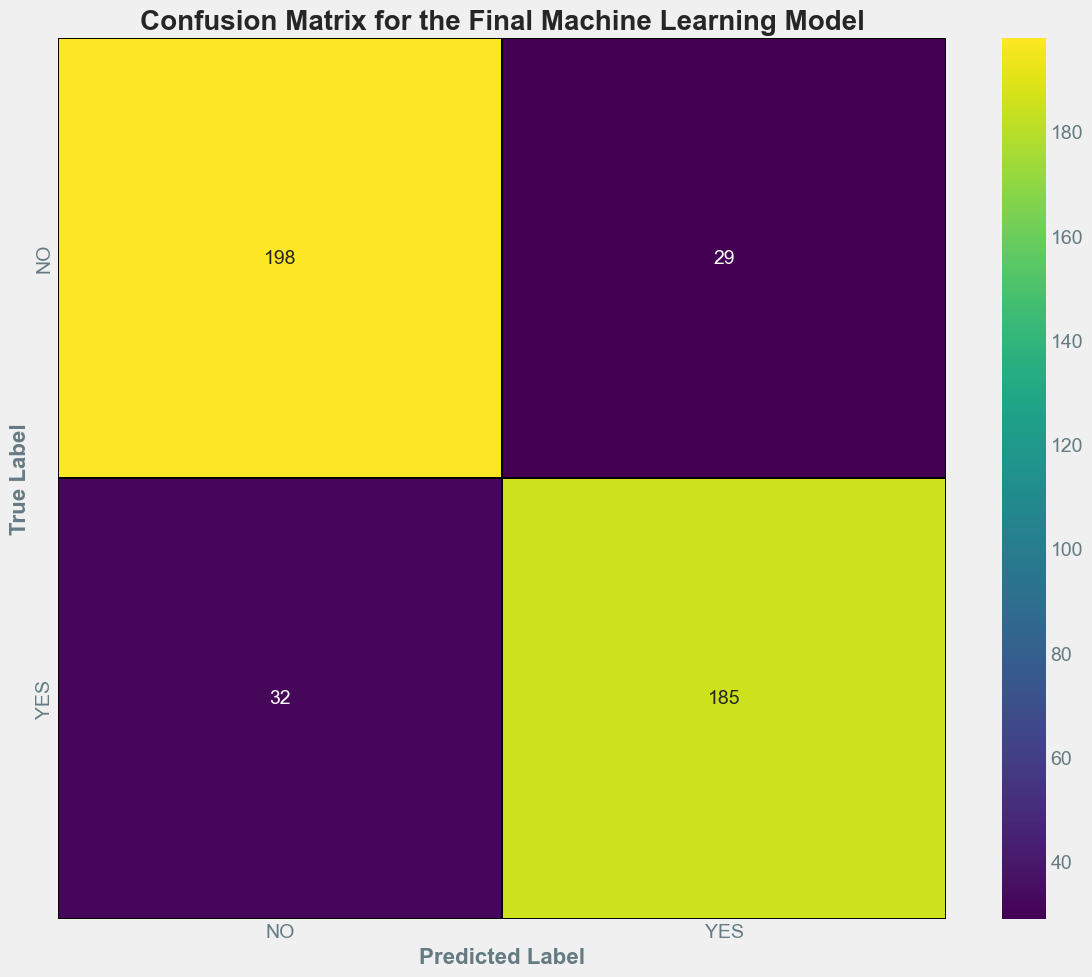

In [95]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(12,10))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="viridis", xticklabels = x_labels, yticklabels = y_labels)
plt.xlabel("Predicted Label",fontsize=16,fontweight='bold')
plt.ylabel("True Label",fontsize=16,fontweight='bold')
plt.title('Confusion Matrix for the Final Machine Learning Model',fontsize=20,fontweight='bold')
plt.show()

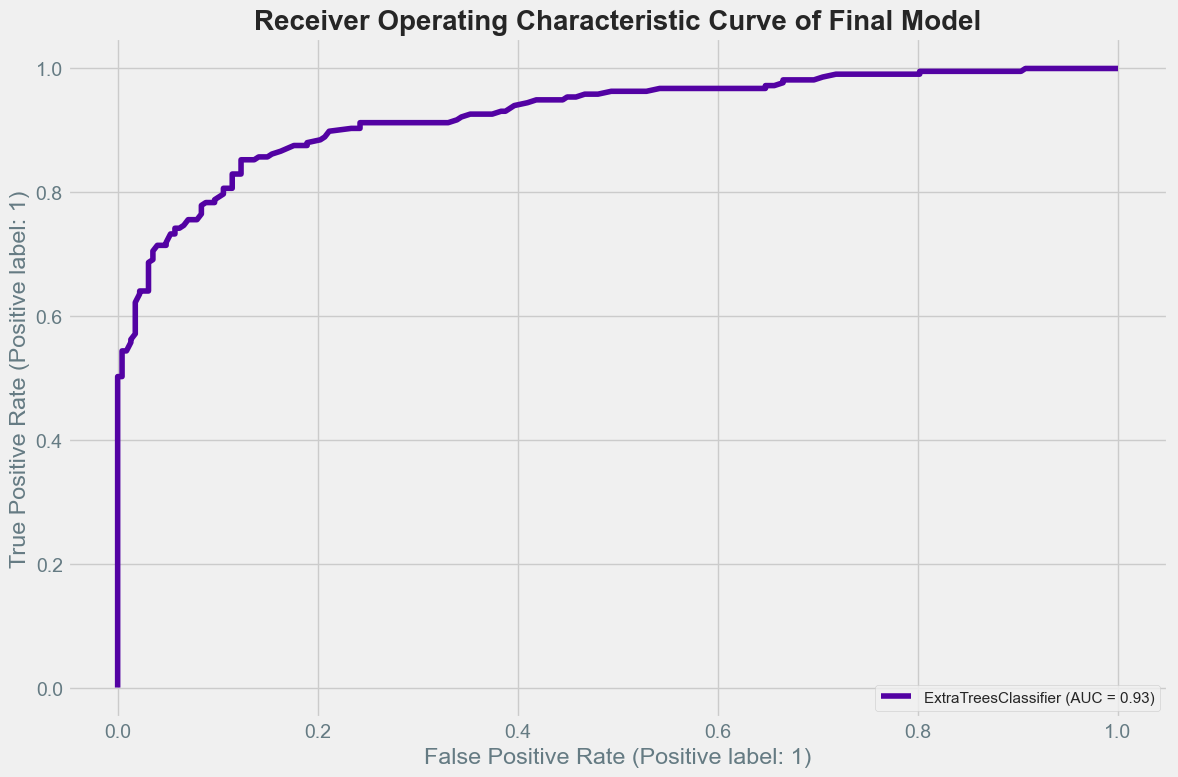

Auc Score :
 0.862390629123612


In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('Receiver Operating Characteristic Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [97]:
import joblib
joblib.dump(Final_mod,'Evaluation_rainfall_claims_Final.pkl')

['Evaluation_Insurance_claims_Final.pkl']

## Predicting the Final Model

In [98]:
# Prediction
prediction = Final_mod.predict(X_test)

In [99]:
Actual = np.array(Y_test)
rainfall_Pred = pd.DataFrame()
rainfall_Pred["Predicted Values"] = prediction
rainfall_Pred["Actual Values"] = Actual
rainfall_Pred.head()

Predicted Values  Actual Values
0                 1              1
1                 0              0
2                 0              0
3                 0              1
4                 1              1